# H&M Personalised Fashion Recommendations

____


## Notebook #1: Exploratory Data Analysis


### 1. Background & Problem Statement
H&M Group is a family of brands and businesses with 53 online markets and around 4,850 stores worldwide. While its online store offers customers an extensive selection of products, they are often bombarded with too many choices, resulting in them not finding products that truly interest them and eventually not making any purchases. 

Therefore, this project aims to develop product recommendations for customers (based on historical data) to enhance their shopping experiences while helping them make the right choices. The articles that each customer will purchase in the next 7-day period will be predicted.

### 2. Data Dictionary


The datasets provided include (link [here](https://www.kaggle.com/c/h-and-m-personalized-fashion-recommendations/data)): 
- images/ - a folder of images corresponding to each article_id; images are placed in subfolders starting with the first three digits of the article_id; note, not all article_id values have a corresponding image.
- articles.csv - detailed metadata for each article_id available for purchase
- customers.csv - metadata for each customer_id in dataset
- sample_submission.csv - a sample submission file in the correct format
- transactions_train.csv - the training data, consisting of the purchases each customer for each date, as well as additional information. Duplicate rows correspond to multiple purchases of the same item. 


|File|Field|Description|Data Type|
|----|-----|-----------|---------|
|articles|article_id|Unique id of each article|integer|
|articles|product_code|Id of product category|integer|
|articles|prod_name|Name of product|object|
|articles|product_type_no|Number assigned to product category|integer|
|articles|product_type_name|Name of product type|object|
|articles|product_group_name|Name of product group|object|
|articles|graphical_appearance_no|Number of graphical appearance|integer|
|articles|graphical_appearance_name|Name of graphical appearance|object|
|articles|colour_group_code|Number/code assigned to colour group|integer|
|articles|colour_group_name|Name of colour group|object|
|articles|perceived_colour_value_id|Id of perceived colour value|integer|
|articles|perceived_colour_value_name|Name of perceived colour value|object|
|articles|perceived_colour_master_id|Id of perceived colour master|integer|
|articles|perceived_colour_master_name|Name of perceived colour master|object|
|articles|department_no|Number assigned to department|integer|
|articles|department_name|Name of department|object|
|articles|index_code|Code assigned to index|object|
|articles|index_name|Name of index|object|
|articles|index_group_no|Number of index group|integer|
|articles|index_group_name|Name of index group|object|
|articles|section_no|Number of section|integer|
|articles|section_name|Name of section|object|
|articles|garment_group_no|Number of garment group|integer|
|articles|garment_group_name|Name of garment group|object|
|articles|detail_desc|Description of product|object|
|customers|customer_id|Unique id assigned to each customer|object|
|customers|FN|??|integer|
|customers|Active|Whether customer is considered as an active buyer|integer|
|customers|club_member_status|Status assigned to customer|object|
|customers|fashion_news_frequency|Whether customer is updated on fashion news|object|
|customers|age|Age of customer|integer|
|customers|postal_code|Postal code of customer|object|
|transactions_train|t_dat|Date of transaction|object|
|transactions_train|customer_id|Unique id assigned to each customer|object|
|transactions_train|article_id|Unique id of each article|integer|
|transactions_train|price|Price of article purchased|integer|
|transactions_train|sales_channel_id|Id of sales channel|integer|
|sample_submission|customer_id|Unique id assigned to each customer|object|
|sample_submission|prediction|List of article ids that each customer purchases|integer|

### 3. Introduction

In this section, we will be importing the relevant packages, datasets as well as carrying out a simple review of the datasets. 

In [91]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# import raw data
articles_df = pd.read_csv('../data/raw/articles.csv')
customers_df = pd.read_csv('../data/raw/customers.csv')
trans_train_df = pd.read_csv('../data/raw/transactions_train.csv')
sample_sub_df = pd.read_csv('../data/raw/sample_submission.csv')

In [3]:
# store the datasets into a list
datasets = [(articles_df, 'Articles'),
            (customers_df, 'Customers'),
            (trans_train_df, 'Transactions (Training)'),
            (sample_sub_df, 'Sample Submission')]

In [4]:
# view the shape and top 5 rows
# check for duplicated rows, missing values and view the datatypes
for df, name in datasets:
    print(f'The {name} dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
    print()

    print(f'Displaying the first five rows of {name} dataset:')
    display(df.head())
    print('___________________________________________\n')

The Articles dataset has 105542 rows and 25 columns.

Displaying the first five rows of Articles dataset:


article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  \
0                     Solid                  9             Black   
1                     Solid                 10             White   
2                    Stripe                 11         Off White   
3                     Solid                  9             Black   
4                     Solid                 10             White   

   perceived_colour_value_id perceived_colour_value_name  \
0                          4                        Dark   
1                          3                       Light   
2                          1                 Dusty Light   
3                          4                        Dark   
4                          3                       Light   

   perceived_colour_master_id perceived_colour_master_name  department_no  \
0                           5                        Black           1676   
1                           9                        White           1676   
2                           9                        White           1676   
3                           5                        Black           1339   
4                           9                        White           1339   

  department_name index_code        index_name  index_group_no  \
0    Jersey Basic          A        Ladieswear               1   
1    Jersey Basic          A        Ladieswear               1   
2    Jersey Basic          A        Ladieswear               1   
3  Clean Lingerie          B  Lingeries/Tights               1   
4  Clean Lingerie          B  Lingeries/Tights               1   

  index_group_name  section_no            section_name  garment_group_no  \
0       Ladieswear          16  Womens Everyday Basics              1002   
1       Ladieswear          16  Womens Everyday Basics              1002   
2       Ladieswear          16  Womens Everyday Basics              1002   
3       Ladieswear          61         Womens Lingerie              1017   
4       Ladieswear          61         Womens Lingerie              1017   

  garment_group_name                                        detail_desc  
0       Jersey Basic            Jersey top with narrow shoulder straps.  
1       Jersey Basic            Jersey top with narrow shoulder straps.  
2       Jersey Basic            Jersey top with narrow shoulder straps.  
3  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...

___________________________________________

The Customers dataset has 1371980 rows and 7 columns.

Displaying the first five rows of Customers dataset:


customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

___________________________________________

The Transactions (Training) dataset has 31788324 rows and 5 columns.

Displaying the first five rows of Transactions (Training) dataset:


t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

___________________________________________

The Sample Submission dataset has 1371980 rows and 2 columns.

Displaying the first five rows of Sample Submission dataset:


customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0706016001 0706016002 0372860001 0610776002 07...  
1  0706016001 0706016002 0372860001 0610776002 07...  
2  0706016001 0706016002 0372860001 0610776002 07...  
3  0706016001 0706016002 0372860001 0610776002 07...  
4  0706016001 0706016002 0372860001 0610776002 07...

___________________________________________



Some observations: 
- From the Articles dataset, it seems that there are 105,542 different articles being sold by H&M. 
- From the Customers dataset, it seems that there are some missing values in `FN` and `Active`.
- From the Sample Submission dataset, multiple `article_id` are listed in the `prediction` column. 

In [5]:
# obtain number of files under image folder
total_folders = total_files = 0
folder_info = []
images_names = []
for base, dirs, files in tqdm(os.walk('../data/raw/images')):
    for directories in dirs:
        folder_info.append((directories, len(os.listdir(os.path.join(base,directories)))))
        total_folders += 1
    for _files in files:
        total_files += 1
        if len(_files.split('.jpg'))==2:
            images_names.append(_files.split('.jpg')[0])   

87it [00:00, 186.89it/s]


In [6]:
# view number of files under image folder
print(f'Total number of folders: {total_folders}')
print(f'Total number of files: {total_files}')

folder_info_df = pd.DataFrame(folder_info, columns=['folder', 'files count'])
folder_info_df.sort_values(['files count'], ascending=False).head()

Total number of folders: 86
Total number of files: 105100


folder  files count
79    069         4187
44    073         3438
26    062         3361
75    068         3313
11    070         3309

In [7]:
# view folder names
print(f'Folder names: ', list(folder_info_df['folder'].unique()))

Folder names:  ['024', '023', '015', '012', '079', '046', '041', '048', '077', '083', '084', '070', '013', '014', '022', '025', '071', '085', '049', '082', '076', '040', '078', '047', '065', '091', '062', '054', '053', '038', '036', '031', '052', '055', '063', '090', '064', '030', '037', '039', '089', '042', '045', '087', '073', '074', '080', '020', '027', '018', '011', '016', '029', '081', '075', '072', '086', '044', '088', '043', '017', '028', '010', '026', '019', '021', '032', '035', '095', '061', '066', '092', '059', '050', '057', '068', '034', '033', '056', '069', '051', '093', '067', '058', '060', '094']


Some observations: 
- In the 'image' folder, it contains a total of 86 sub-folders with 105,100 image files. 

### 4. Exploratory Data Analysis

In this section, we will be looking into further details for each dataset, and creating visualisations to aid in our understanding. 

Special shout-out to fellow Kaggler (Gabriel Preda) for his guidance in the EDA phase (link [here](https://www.kaggle.com/gpreda/h-m-eda-and-prediction#Let's-look-closer-to-the-data)).

#### 4.1. Articles Dataset

In [8]:
# create function for simple eda
# view the shape and top 5 rows
# check for duplicated rows, missing values and view the datatypes

def simple_eda(df, name):    
    print(f'The {name} dataset has {df.shape[0]} rows and {df.shape[1]} columns.')
    print()
    
    print(f'No. of duplicated rows: {df[df.duplicated(keep=False)].shape[0]}')
    print()
    
    print('Columns with missing values:')
    print(df.isnull().sum())
    print()
    
    print('View data types:')
    print(df.dtypes)
    print()
    
    print(f'Displaying the first five rows of {name} dataset:')
    display(df.head())

In [9]:
# create function to obtain count of unique values
def unique_values(df):
    total_val = df.count()
    total_val_df = pd.DataFrame(total_val)
    total_val_df.columns = ['total']
    unique_val = []
    for col in df.columns:
        unique = df[col].nunique()
        unique_val.append(unique)
    total_val_df['unique'] = unique_val
    return total_val_df

In [10]:
# apply function for simple_eda
simple_eda(df=articles_df, name='Articles')

The Articles dataset has 105542 rows and 25 columns.

No. of duplicated rows: 0

Columns with missing values:
article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc               

article_id  product_code          prod_name  product_type_no  \
0   108775015        108775          Strap top              253   
1   108775044        108775          Strap top              253   
2   108775051        108775      Strap top (1)              253   
3   110065001        110065  OP T-shirt (Idro)              306   
4   110065002        110065  OP T-shirt (Idro)              306   

  product_type_name  product_group_name  graphical_appearance_no  \
0          Vest top  Garment Upper body                  1010016   
1          Vest top  Garment Upper body                  1010016   
2          Vest top  Garment Upper body                  1010017   
3               Bra           Underwear                  1010016   
4               Bra           Underwear                  1010016   

  graphical_appearance_name  colour_group_code colour_group_name  \
0                     Solid                  9             Black   
1                     Solid                 10             White   
2                    Stripe                 11         Off White   
3                     Solid                  9             Black   
4                     Solid                 10             White   

   perceived_colour_value_id perceived_colour_value_name  \
0                          4                        Dark   
1                          3                       Light   
2                          1                 Dusty Light   
3                          4                        Dark   
4                          3                       Light   

   perceived_colour_master_id perceived_colour_master_name  department_no  \
0                           5                        Black           1676   
1                           9                        White           1676   
2                           9                        White           1676   
3                           5                        Black           1339   
4                           9                        White           1339   

  department_name index_code        index_name  index_group_no  \
0    Jersey Basic          A        Ladieswear               1   
1    Jersey Basic          A        Ladieswear               1   
2    Jersey Basic          A        Ladieswear               1   
3  Clean Lingerie          B  Lingeries/Tights               1   
4  Clean Lingerie          B  Lingeries/Tights               1   

  index_group_name  section_no            section_name  garment_group_no  \
0       Ladieswear          16  Womens Everyday Basics              1002   
1       Ladieswear          16  Womens Everyday Basics              1002   
2       Ladieswear          16  Womens Everyday Basics              1002   
3       Ladieswear          61         Womens Lingerie              1017   
4       Ladieswear          61         Womens Lingerie              1017   

  garment_group_name                                        detail_desc  
0       Jersey Basic            Jersey top with narrow shoulder straps.  
1       Jersey Basic            Jersey top with narrow shoulder straps.  
2       Jersey Basic            Jersey top with narrow shoulder straps.  
3  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...  
4  Under-, Nightwear  Microfibre T-shirt bra with underwired, moulde...

Some observations:
- Only `detail_desc` in the Articles dataset has missing rows of information.
- The data types are distributed between 'int64' and 'object'. 

In [11]:
# obtain unique count of values
unique_values(df=articles_df)

total  unique
article_id                    105542  105542
product_code                  105542   47224
prod_name                     105542   45875
product_type_no               105542     132
product_type_name             105542     131
product_group_name            105542      19
graphical_appearance_no       105542      30
graphical_appearance_name     105542      30
colour_group_code             105542      50
colour_group_name             105542      50
perceived_colour_value_id     105542       8
perceived_colour_value_name   105542       8
perceived_colour_master_id    105542      20
perceived_colour_master_name  105542      20
department_no                 105542     299
department_name               105542     250
index_code                    105542      10
index_name                    105542      10
index_group_no                105542       5
index_group_name              105542       5
section_no                    105542      57
section_name                  105542      56
garment_group_no              105542      21
garment_group_name            105542      21
detail_desc                   105126   43404

Looking at the count of unique values, it seems that:
- Only `article_id` contains all 105,542 unique values.
- While some of the id and name fields are expected to have the same number of values, they differ - i.e. `product_type_no` vs `product_type_name`, `department_no` vs `department_name`, `section_no` vs `section_name`.

In [12]:
# create function to plot distribution of categorical variables
def plot_group_cat(group, cat, category_name, title, rotation):
    temp = articles_df.groupby([group])[cat].nunique()
    df = pd.DataFrame({category_name: temp.index, 'count': temp.values})
    df = df.sort_values(['count'], ascending=False)
    plt.figure(figsize=(16,5))
    plt.title(title)
    s = sns.barplot(x=category_name, y='count', data=df)
    s.set_xticklabels(s.get_xticklabels(), rotation=rotation)
    locs, labels = plt.xticks()
    plt.show()

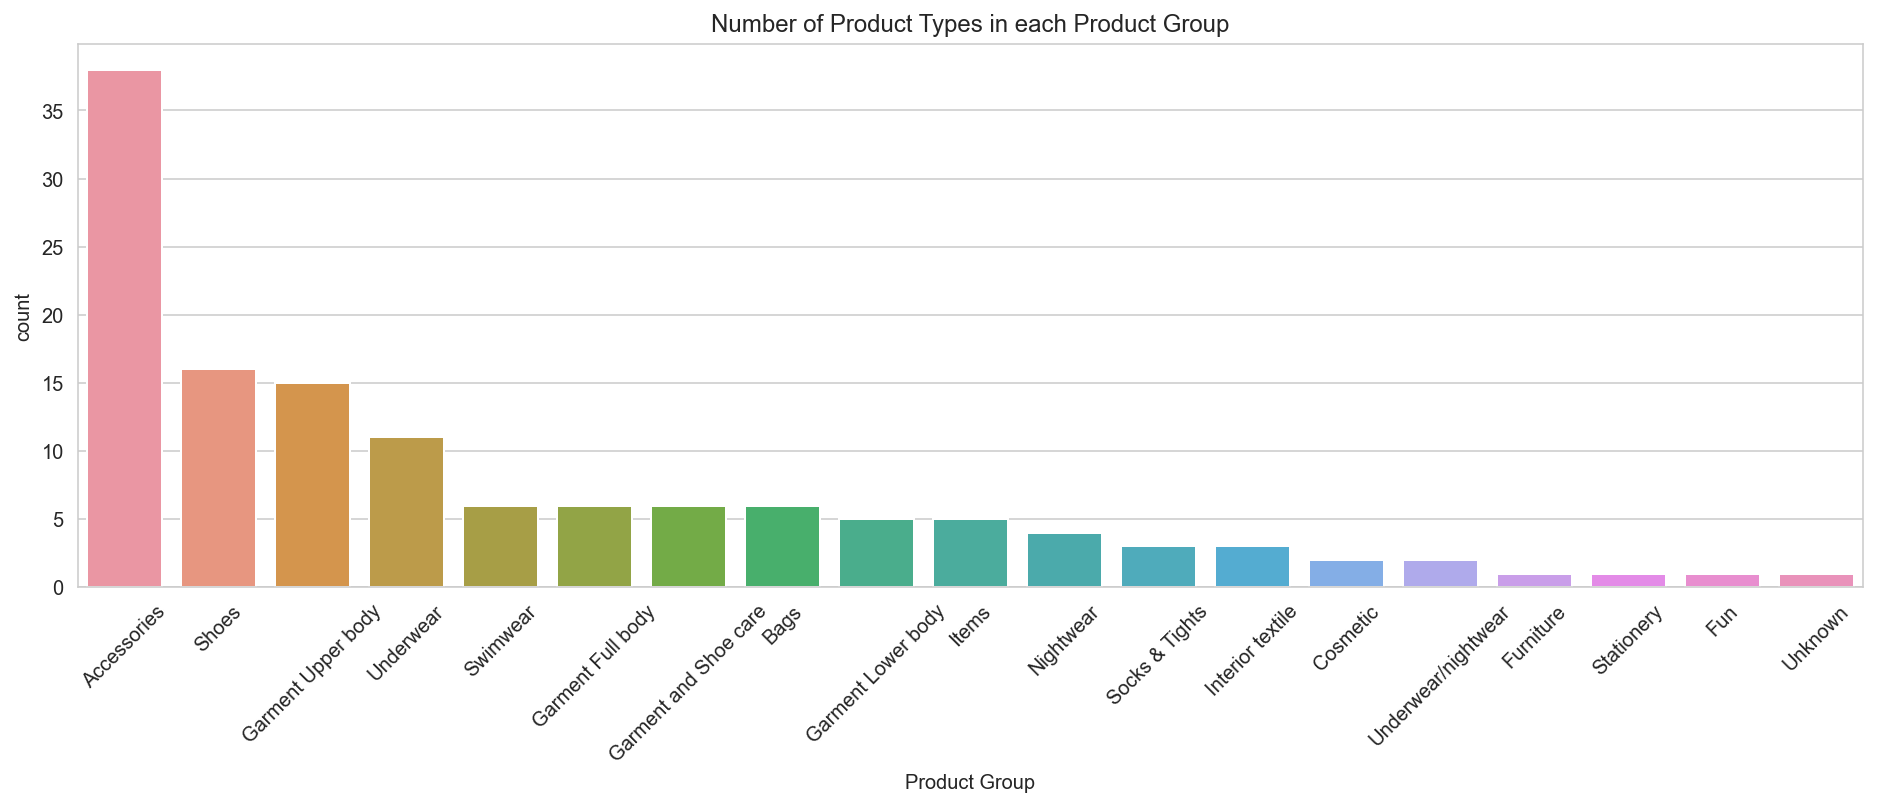

In [13]:
# view distribution of product_type_no within product_group_name
plot_group_cat(group='product_group_name', cat='product_type_no', category_name='Product Group', title='Number of Product Types in each Product Group', rotation=45)

Seems like a higher proportion of product types belong to the 'Accessories' product group, followed by 'Shoes', 'Garment Upper body', etc. 

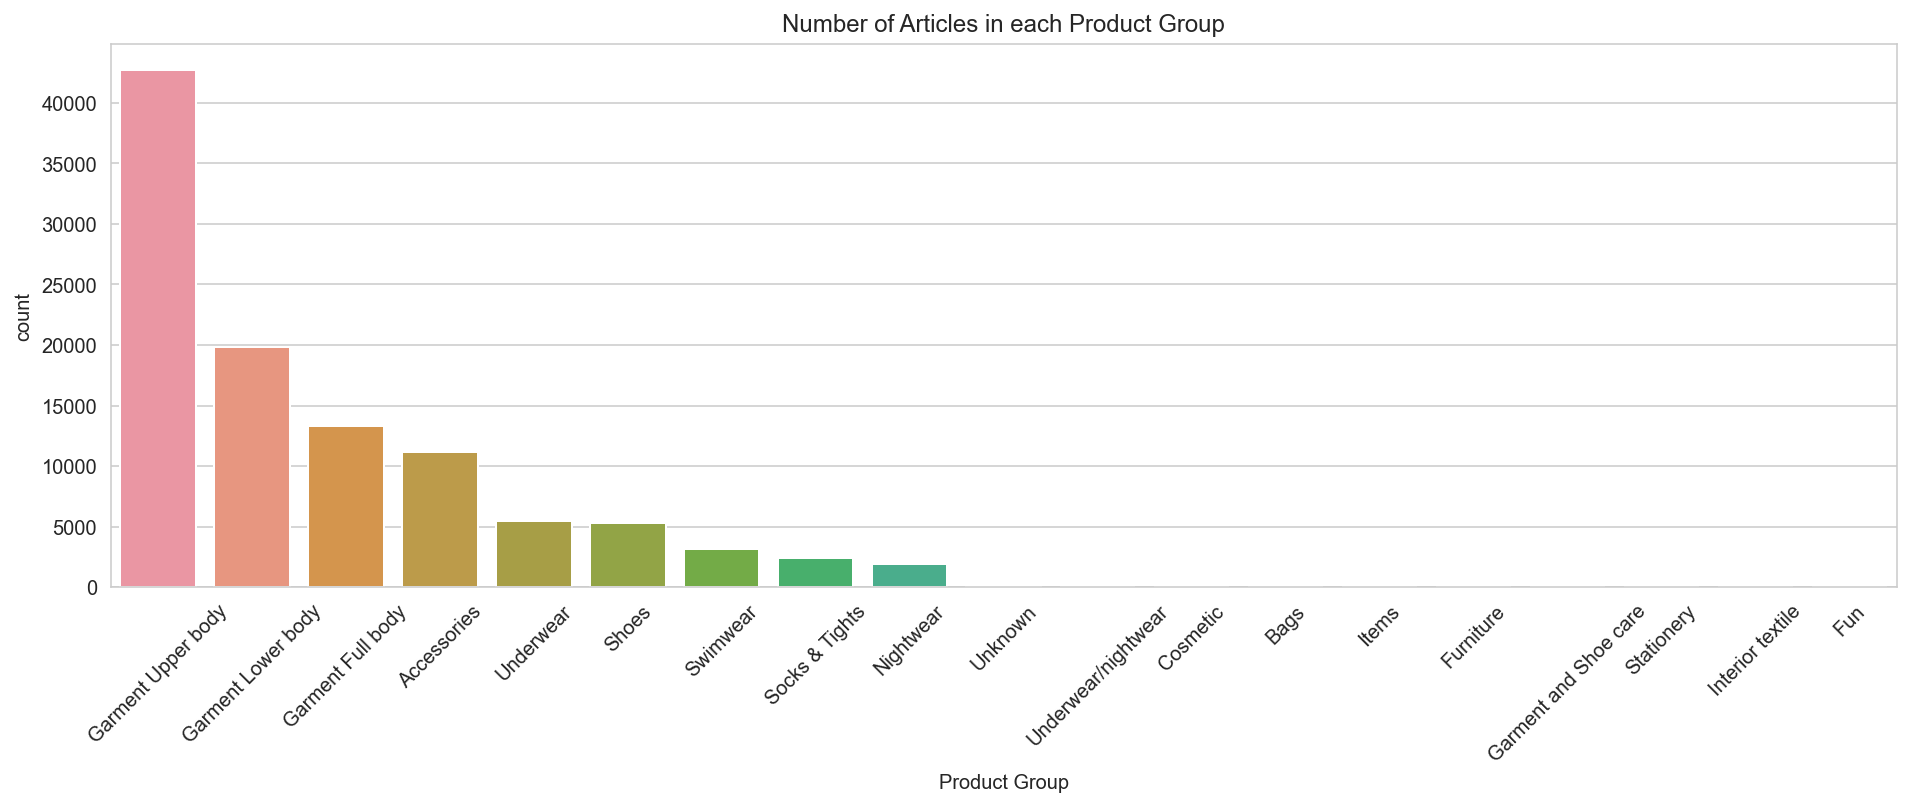

In [14]:
# view distribution of article_id within product_group_name
plot_group_cat(group='product_group_name', cat='article_id', category_name='Product Group', title='Number of Articles in each Product Group', rotation=45)

Close to half of the articles sold at H&M Fashion stores are 'Garment Upper body' product group items, followed by 'Garment Lower body' and 'Garment Full body'.

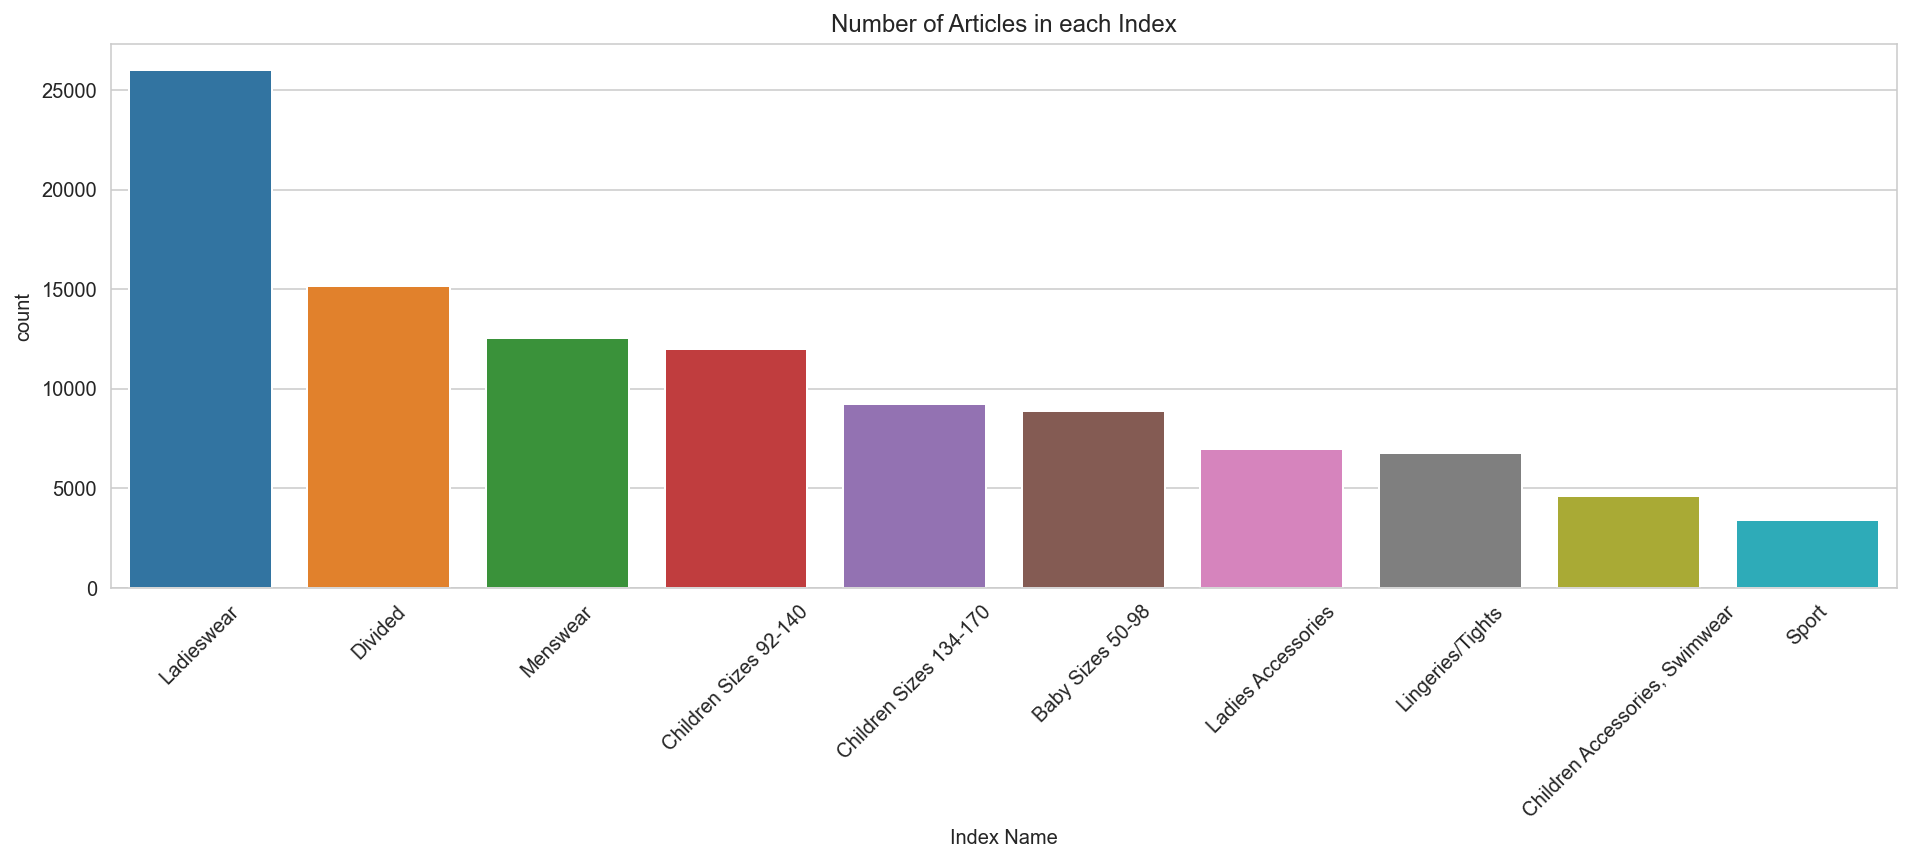

In [15]:
# view distribution of article_id within index_name
plot_group_cat(group='index_name', cat='article_id', category_name='Index Name', title='Number of Articles in each Index', rotation=45)

Seems like the highest number of articles belong to the 'Ladieswear' index category, followed by 'Divided' and 'Menswear'.

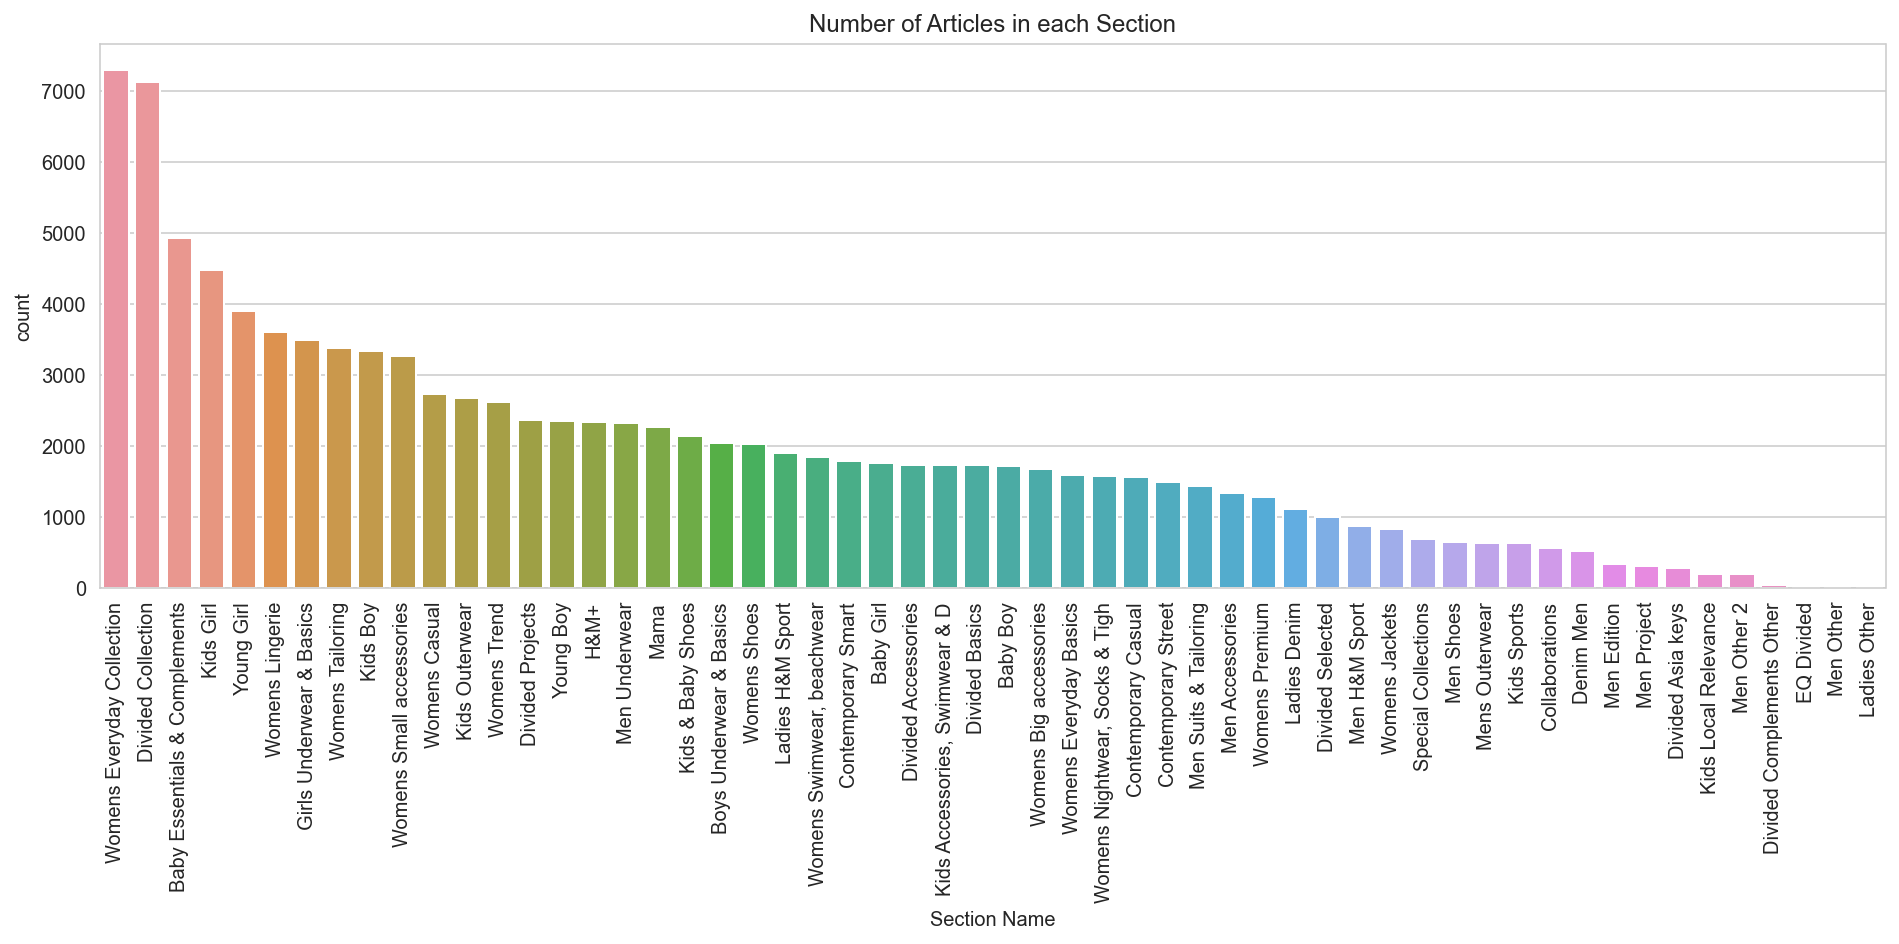

In [16]:
# view distribution of article_id within section_name
plot_group_cat(group='section_name', cat='article_id', category_name='Section Name', title='Number of Articles in each Section', rotation=90)

It is interesting to note that the sections 'Womens Everyday Collection' and 'Divided Collection' are most popular - far greater than the next ranking section on 'Baby Essentials & Complements'.

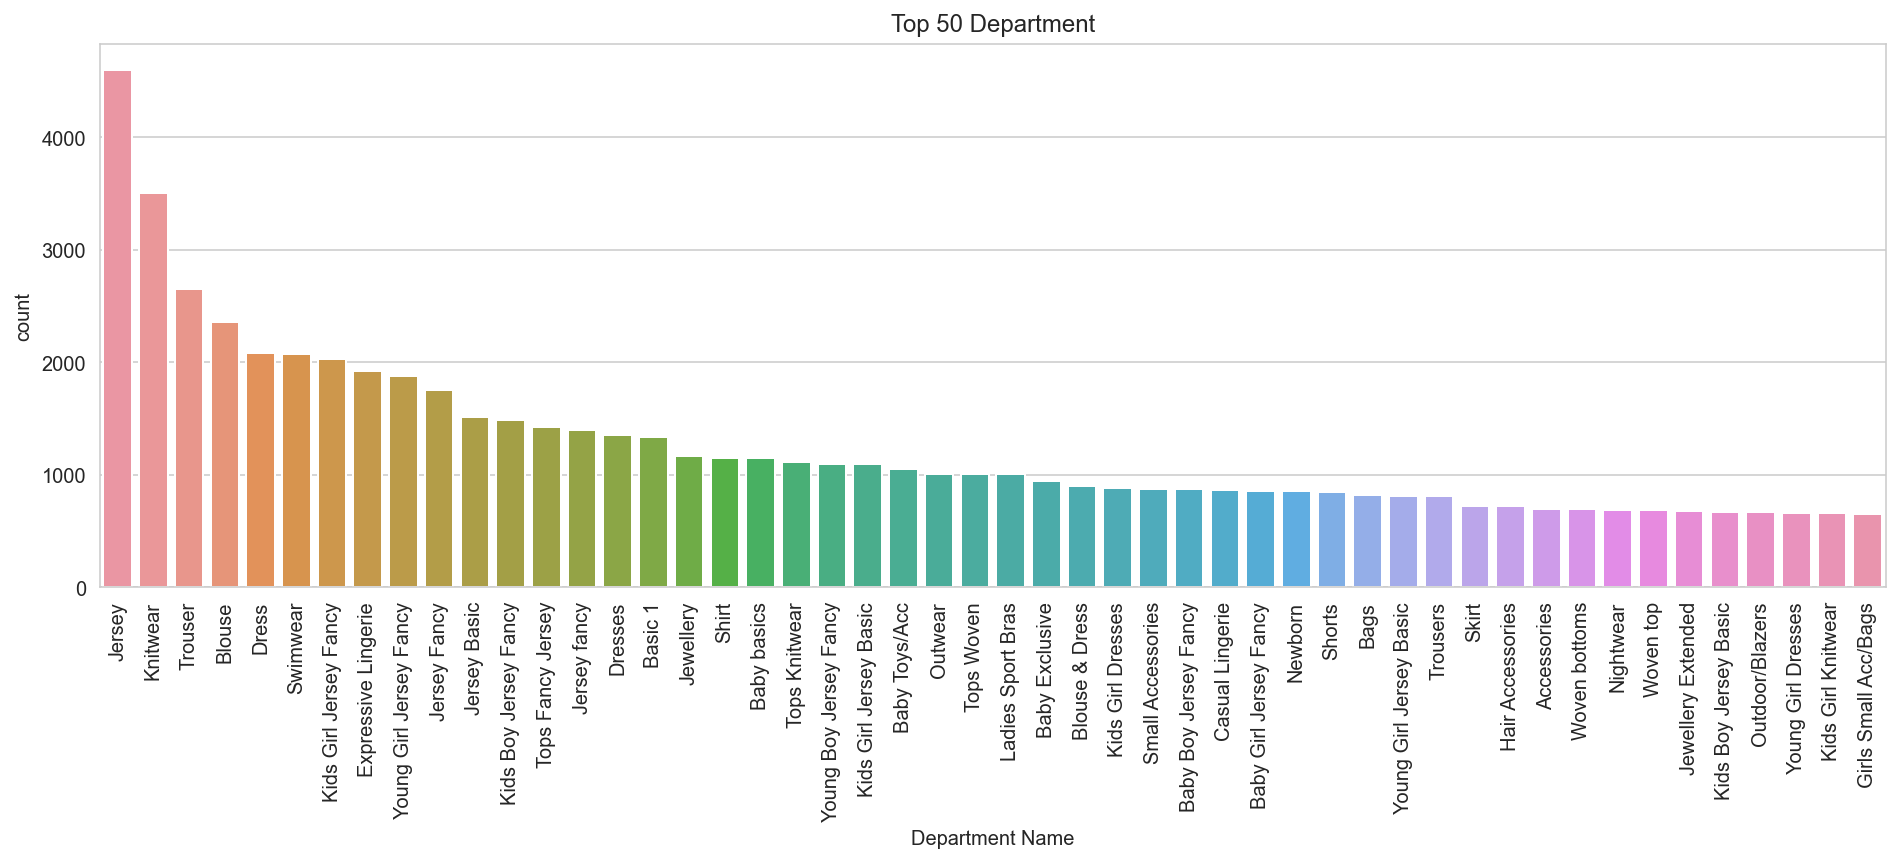

In [17]:
# view distribution of article_id within department_name
temp = articles_df.groupby(['department_name'])['article_id'].nunique()
df = pd.DataFrame({'Department Name': temp.index, 'count': temp.values})
df = df.sort_values(['count'], ascending=False).head(50)
plt.figure(figsize=(16,5))
plt.title('Top 50 Department')
s = sns.barplot(x='Department Name', y='count', data=df)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
locs, labels = plt.xticks()
plt.show()

Seems like 'Jersey' is the most popular department, followed by 'Knitwear' and 'Trouser'.

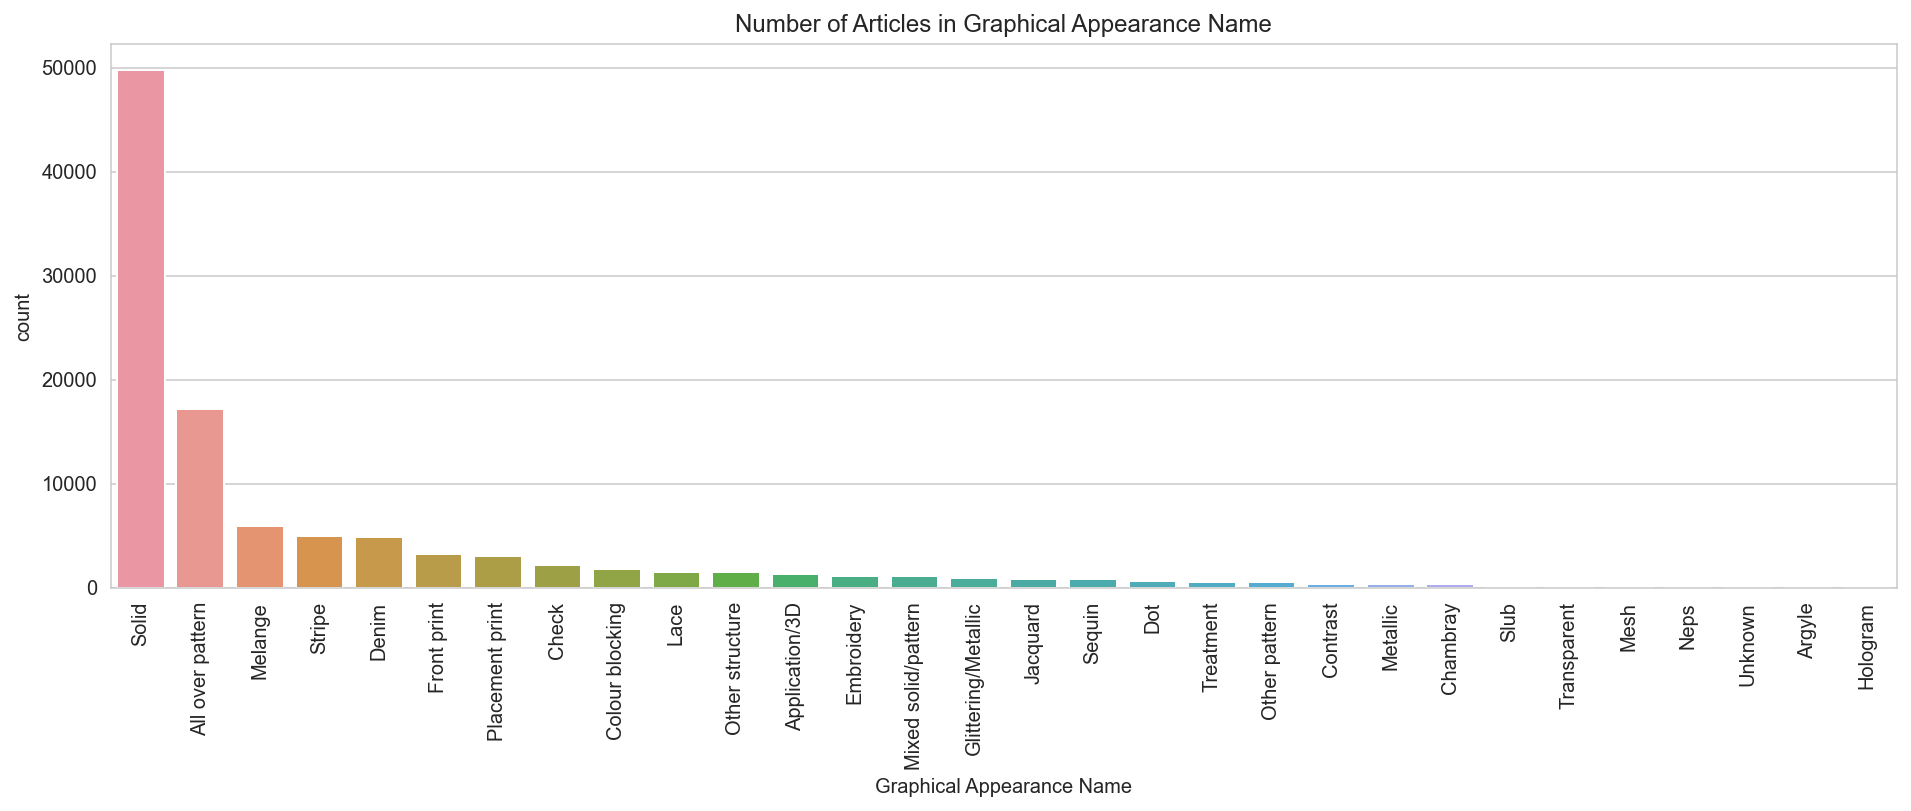

In [18]:
# view distribution of article_id within graphical_appearance_name
plot_group_cat(group='graphical_appearance_name', cat='article_id', category_name='Graphical Appearance Name', 
               title='Number of Articles in Graphical Appearance Name', rotation=90)

It is interesting to observe that 'Solid' is the top most frequent graphical appearance used, in contrast to 'Hologram'. 

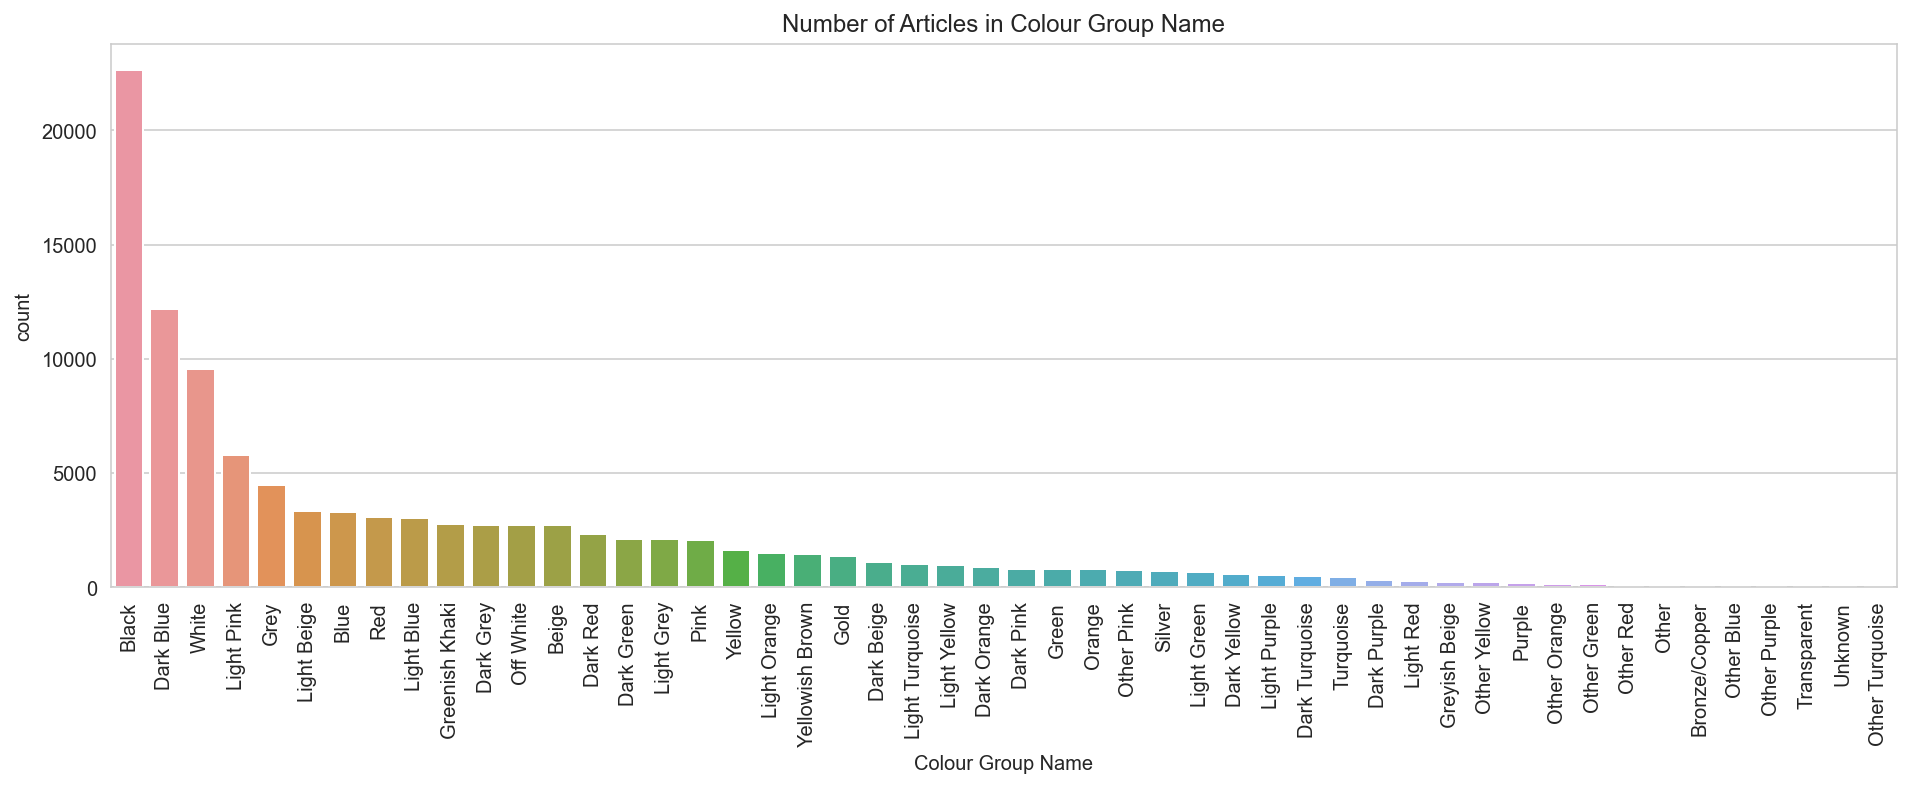

In [19]:
# view distribution of article_id within colour_group_name
plot_group_cat(group='colour_group_name', cat='article_id', category_name='Colour Group Name', title='Number of Articles in Colour Group Name', rotation=90)

Black undoubtedly is the most frequently used colour group, given its neutrality, followed by Dark Blue and White.

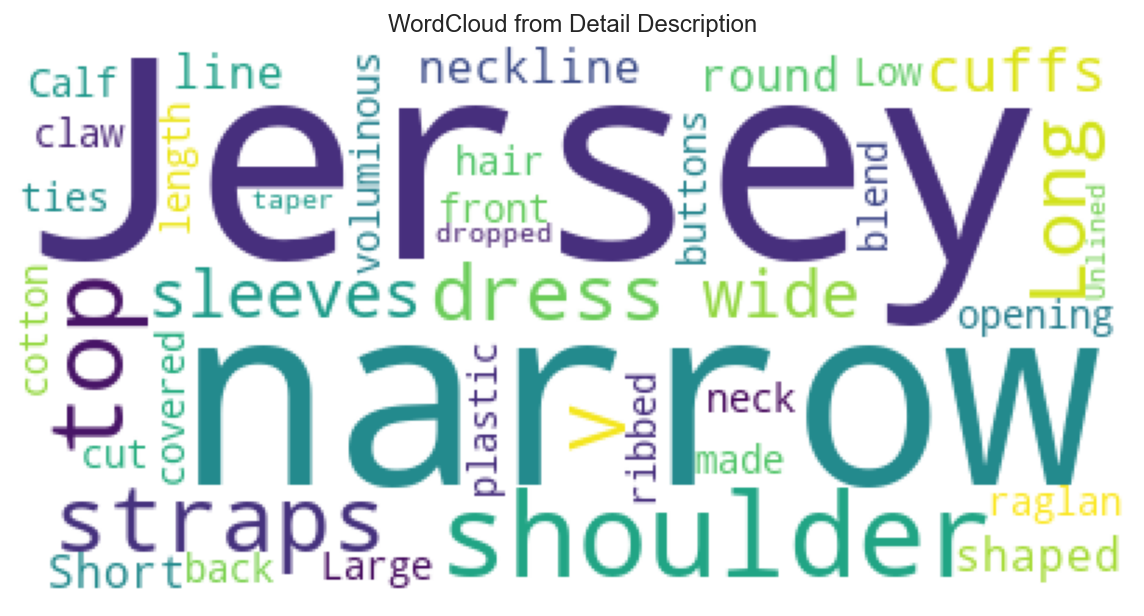

In [20]:
# set stopwords
stopwords = set(STOPWORDS)

# generate a word cloud for the column detail_desc
text = articles_df['detail_desc'].values
wordcloud = WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words=500).generate(str(text))

plt.figure(figsize=(10,10))
plt.title('WordCloud from Detail Description')
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Based on the WordCloud generated from `detail_desc`, it seems like 'Jersey' remains one of the popular item, followed by 'narrow' type of clothings / accessories. 

#### 4.2. Customers Dataset

In [21]:
# apply function for simple_eda
simple_eda(df=customers_df, name='Customers')

The Customers dataset has 1371980 rows and 7 columns.

No. of duplicated rows: 0

Columns with missing values:
customer_id                    0
FN                        895050
Active                    907576
club_member_status          6062
fashion_news_frequency     16009
age                        15861
postal_code                    0
dtype: int64

View data types:
customer_id                object
FN                        float64
Active                    float64
club_member_status         object
fashion_news_frequency     object
age                       float64
postal_code                object
dtype: object

Displaying the first five rows of Customers dataset:


customer_id   FN  Active  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...  NaN     NaN   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...  NaN     NaN   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...  NaN     NaN   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...  NaN     NaN   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...  1.0     1.0   

  club_member_status fashion_news_frequency   age  \
0             ACTIVE                   NONE  49.0   
1             ACTIVE                   NONE  25.0   
2             ACTIVE                   NONE  24.0   
3             ACTIVE                   NONE  54.0   
4             ACTIVE              Regularly  52.0   

                                         postal_code  
0  52043ee2162cf5aa7ee79974281641c6f11a68d276429a...  
1  2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...  
2  64f17e6a330a85798e4998f62d0930d14db8db1c054af6...  
3  5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...  
4  25fa5ddee9aac01b35208d01736e57942317d756b32ddd...

Some observations:
- Only `customer_id` and `postal_code` in the Customers dataset are completely filled; null values remain present in the other columns.
- It is interesting to note that `postal_code` contains a mixture of alphabets and numbers, instead of just numbers which may be more frequently used. 

In [22]:
# obtain unique count of values
unique_values(df=customers_df)

total   unique
customer_id             1371980  1371980
FN                       476930        1
Active                   464404        1
club_member_status      1365918        3
fashion_news_frequency  1355971        4
age                     1356119       84
postal_code             1371980   352899

Looking at the count of unique values, it seems that:
- Only `customer_id` contains all 1,371,980 unique values.
- There are 84 different age values, which may be surprising, though this can mean that younger audiences are included in the list.
- Only 352,899 unique values exist under `postal_code`, indicating that some customers may be staying at the same location, or there may be multiple `customer_id` for the same customer. 

In [23]:
# create function to plot distribution of categorical variables
def plot_chart_cat(group, cat, category_name, title, rotation):
    temp = customers_df.groupby([group])[cat].nunique()
    df = pd.DataFrame({category_name: temp.index, 'count': temp.values})
    df = df.sort_values(['count'], ascending=False)
    plt.figure(figsize=(16,5))
    plt.title(title)
    s = sns.barplot(x=category_name, y='count', data=df)
    s.set_xticklabels(s.get_xticklabels(), rotation=rotation)
    locs, labels = plt.xticks()
    plt.show()

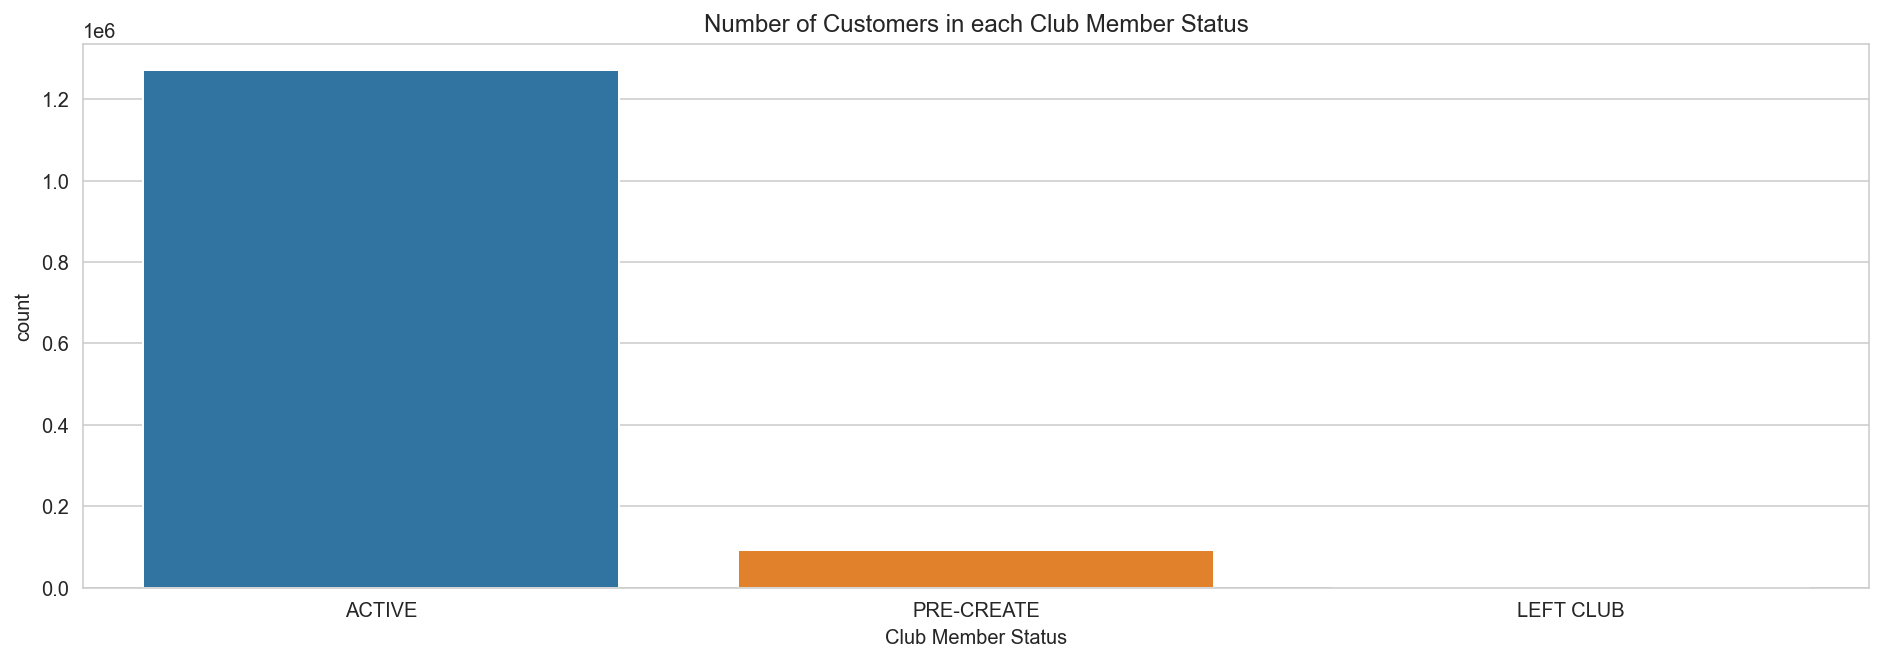

In [24]:
# view distribution by club_member_status
plot_chart_cat(group='club_member_status', cat='customer_id', category_name='Club Member Status', title='Number of Customers in each Club Member Status', rotation=0)

Based on the `club_member_status`, it seems that majority of customers have 'ACTIVE' status, whilst some customers have their profiles 'pre-created'; few left the club membership.

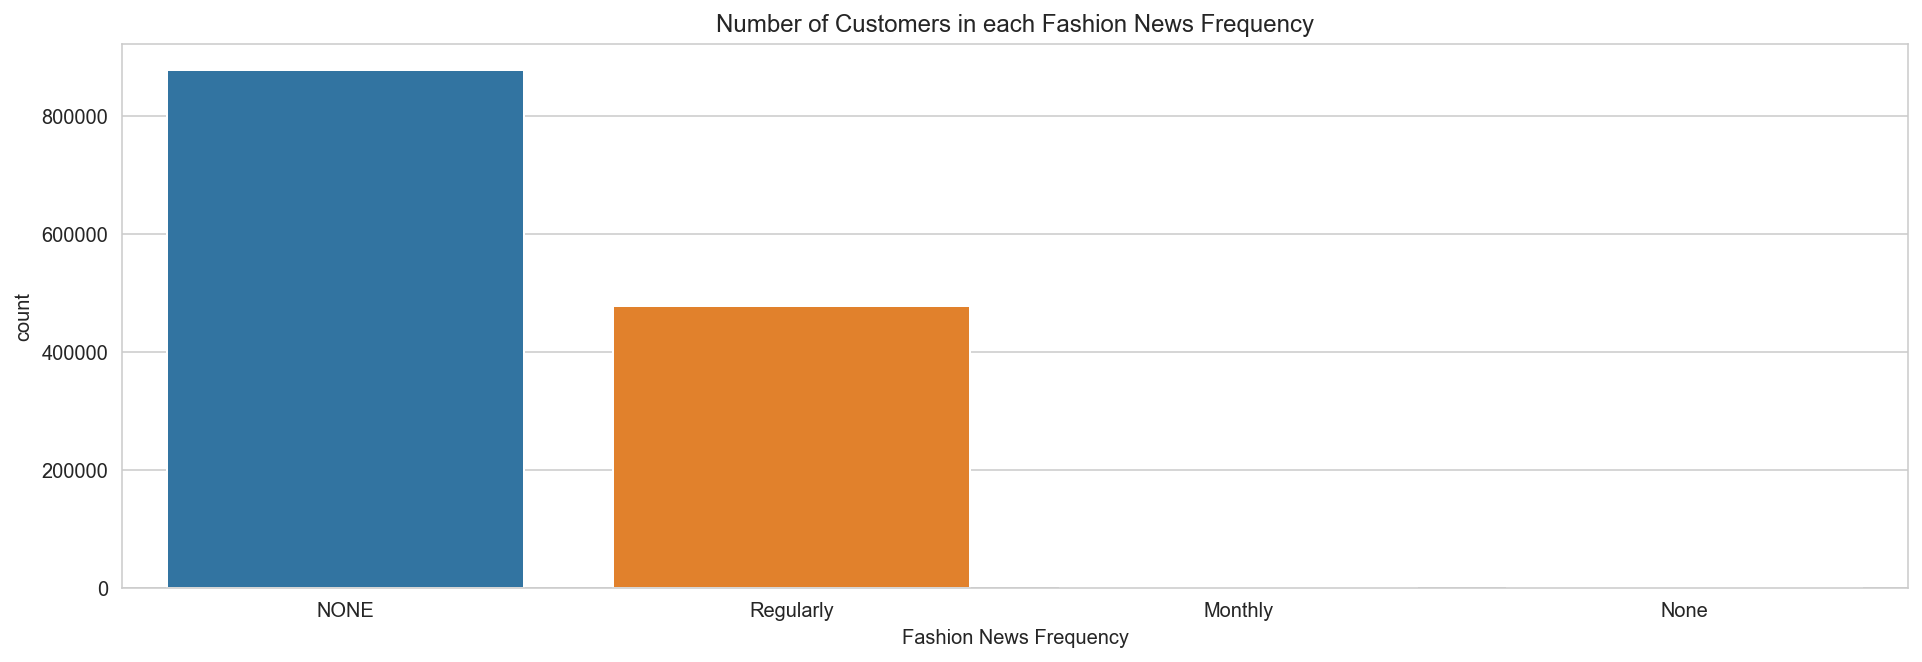

In [25]:
# view distribution by fashion_news_frequency
plot_chart_cat(group='fashion_news_frequency', cat='customer_id', category_name='Fashion News Frequency', 
               title='Number of Customers in each Fashion News Frequency', rotation=0)

Based on the `fashion_news_frequency`, it seems that majority (close to two-thirds) of customers currently do not receive updates on the latest fashion news; more than one-third may receive such fashion news 'regularly'.

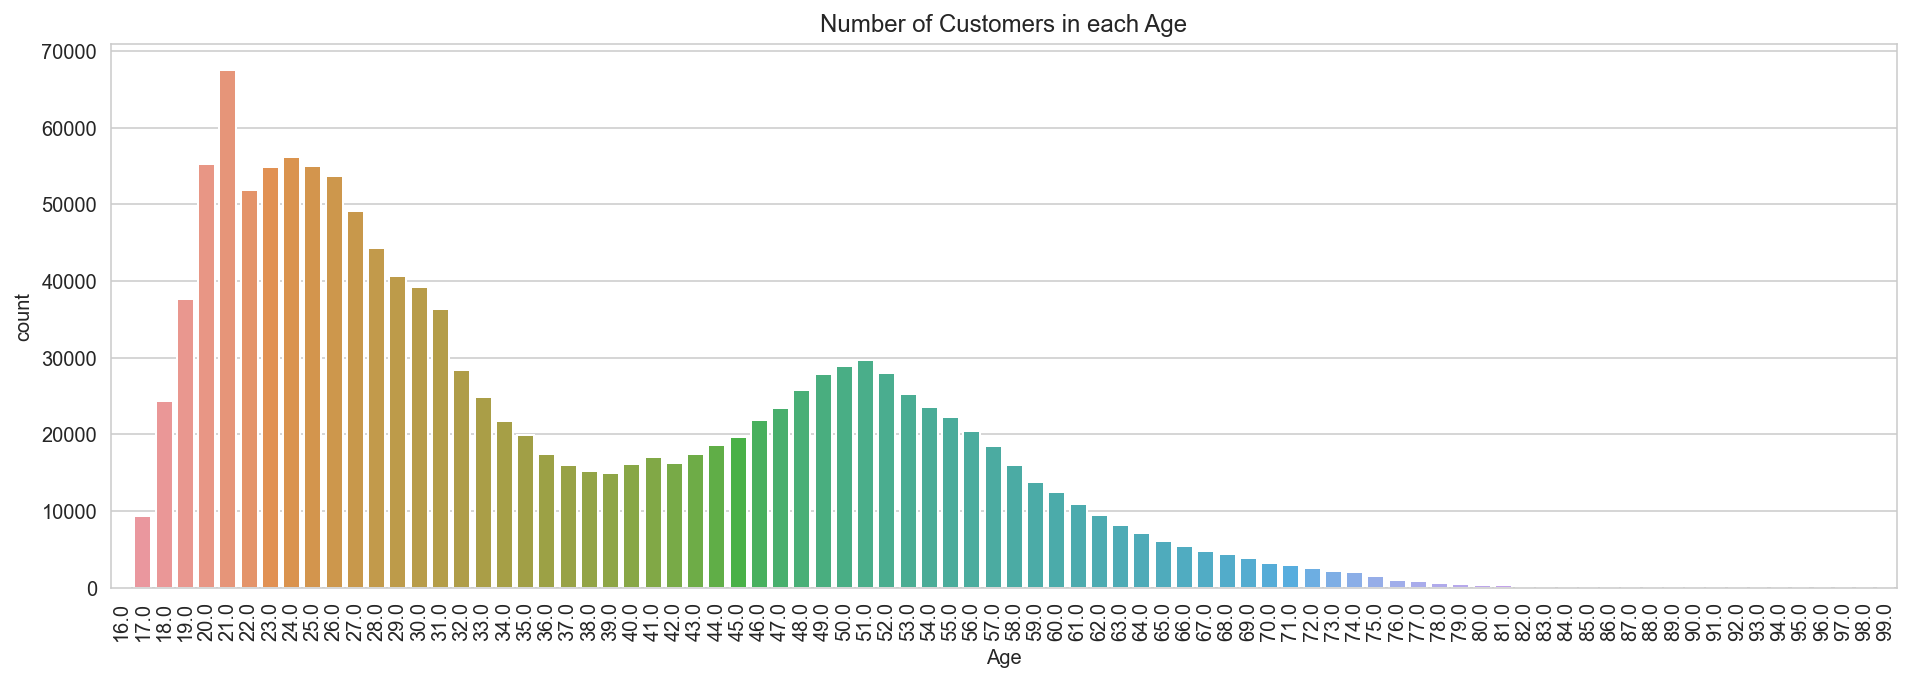

In [26]:
# view distribution by age
plot_chart_cat(group='age', cat='customer_id', category_name='Age', title='Number of Customers in each Age', rotation=90)

By plotting the `age`, we can see that the distribution of the number of customers in each age follows a bimodal distribution, where there are two peaks - one around 20 to 25 years old, and the other peak is around 49 to 52 years old. It is notable that there's a greater proportion of customers who are below 30 years old. 

#### 4.3. Transactions Dataset

In [27]:
# apply function for simple_eda
simple_eda(df=trans_train_df, name='Transactions')

The Transactions dataset has 31788324 rows and 5 columns.

No. of duplicated rows: 5518813

Columns with missing values:
t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

View data types:
t_dat                object
customer_id          object
article_id            int64
price               float64
sales_channel_id      int64
dtype: object

Displaying the first five rows of Transactions dataset:


t_dat                                        customer_id  article_id  \
0  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   663713001   
1  2018-09-20  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   541518023   
2  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   505221004   
3  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687003   
4  2018-09-20  00007d2de826758b65a93dd24ce629ed66842531df6699...   685687004   

      price  sales_channel_id  
0  0.050831                 2  
1  0.030492                 2  
2  0.015237                 2  
3  0.016932                 2  
4  0.016932                 2

Some observations:
- There are no missing values in the Transactions dataset.
- `t_dat` represents the transaction date, but it is in the wrong data type.

In [28]:
# obtain unique count of values
unique_values(df=trans_train_df)

total   unique
t_dat             31788324      734
customer_id       31788324  1362281
article_id        31788324   104547
price             31788324     9857
sales_channel_id  31788324        2

Looking at the count of unique values, it seems that:
- 734 days of transactions (under `t_dat`) are logged.
- There are 2 sales channels under `sales_channel_id`, though there aren't many details about the channels. 
- Around 1.36 mn customers have purchased an item, and not all 1.37mn unique `customer_id`.
- Around 104k articles have been purchased, not all 105k `article_id`. 

In [29]:
# convert t_dat to proper format 
trans_train_df['t_dat'] = pd.to_datetime(trans_train_df['t_dat'])

Text(0, 0.5, 'No. of transactions')

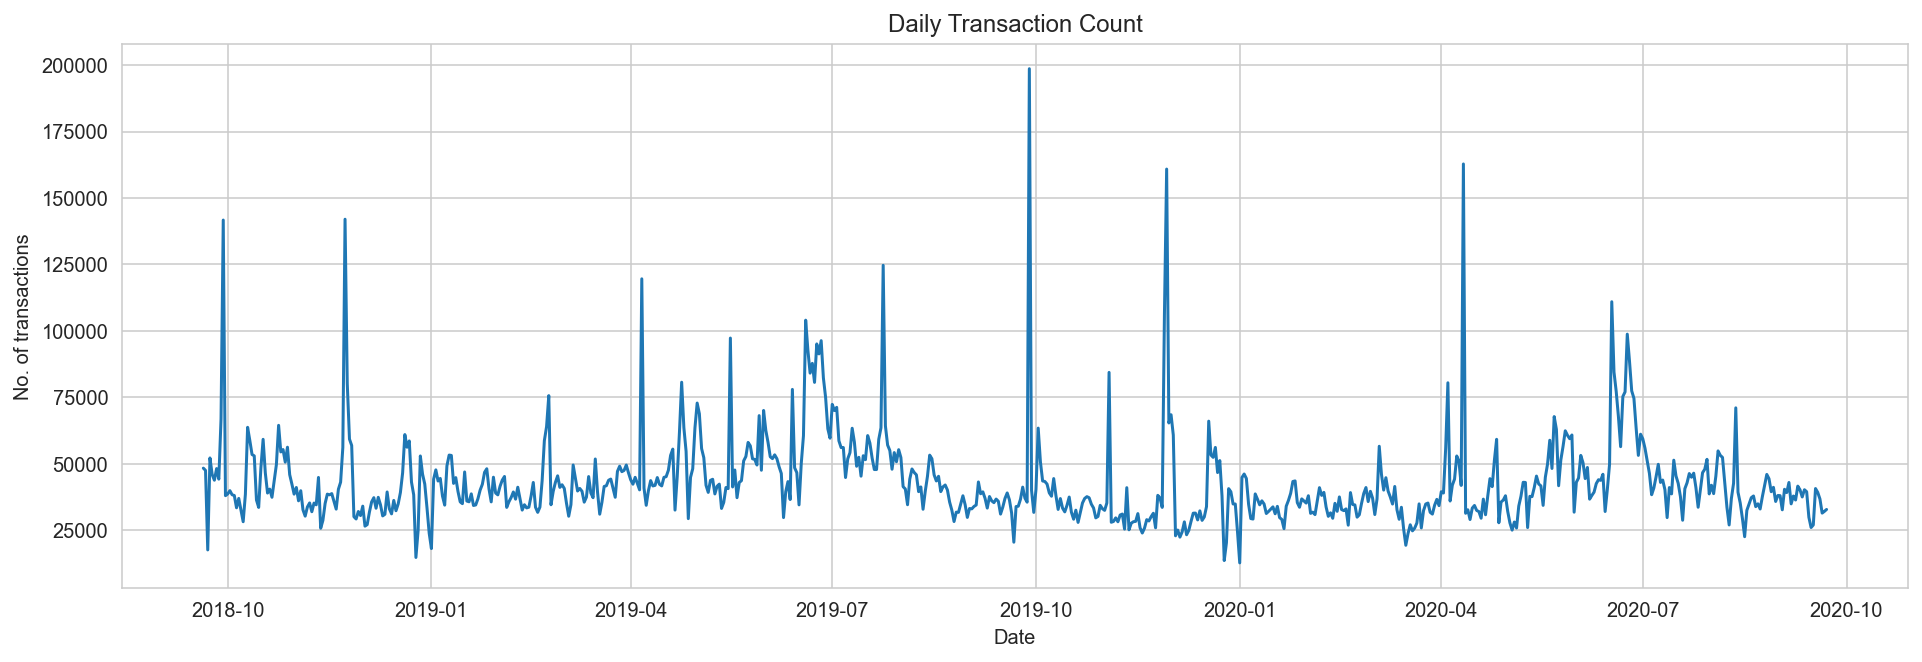

In [34]:
# view distribution of daily transactions
temp = trans_train_df.groupby('t_dat')['article_id'].count().reset_index()
temp.columns = ['date', 'count_of_transactions']
plt.figure(figsize=(16,5))
plt.title('Daily Transaction Count')
plt.plot(temp['date'], temp['count_of_transactions'])
plt.xlabel('Date')
plt.ylabel('No. of transactions')

By plotting the daily counts of transactions, it can be observed that there are certain days with peaks in volume, such as towards 2018-10, 2019-04, 2019-08, 2019-10, 2019-12, 2020-04, etc. These periods may coincide with special events, promotions or holidays that encourage customers to purchase clothing and accessories. 

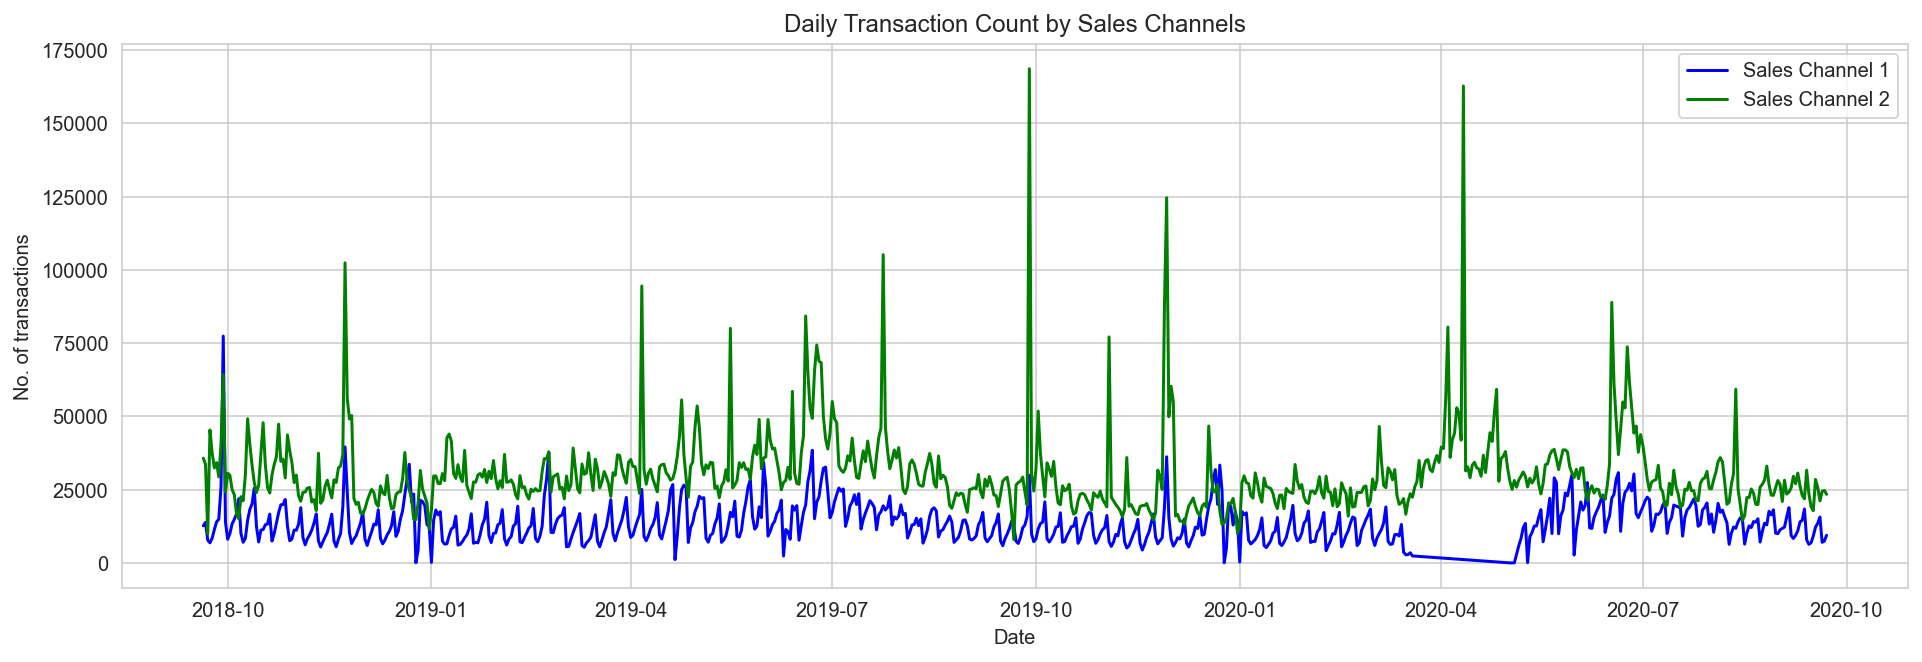

In [40]:
# view distribution of daily transactions, differentiated by sales channel 
temp = trans_train_df.groupby(['t_dat','sales_channel_id'])['article_id'].count().reset_index()
temp.columns = ['date', 'sales_channel', 'count_of_transactions']
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(temp.loc[temp['sales_channel']==1,'date'], temp.loc[temp['sales_channel']==1,'count_of_transactions'], label='Sales Channel 1', color='blue')
ax.plot(temp.loc[temp['sales_channel']==2,'date'], temp.loc[temp['sales_channel']==2,'count_of_transactions'], label='Sales Channel 2', color='green')
ax.legend()
plt.title('Daily Transaction Count by Sales Channels')
plt.xlabel('Date')
plt.ylabel('No. of transactions')
plt.show()

By comparing the transaction volume based on `sales_channel_id`, it can be seen that 'Sales Channel 2' garners higher transactions generally throughout the observation window, with majority of the peaks stemming from this sales channel.

Text(0, 0.5, 'Mean Price')

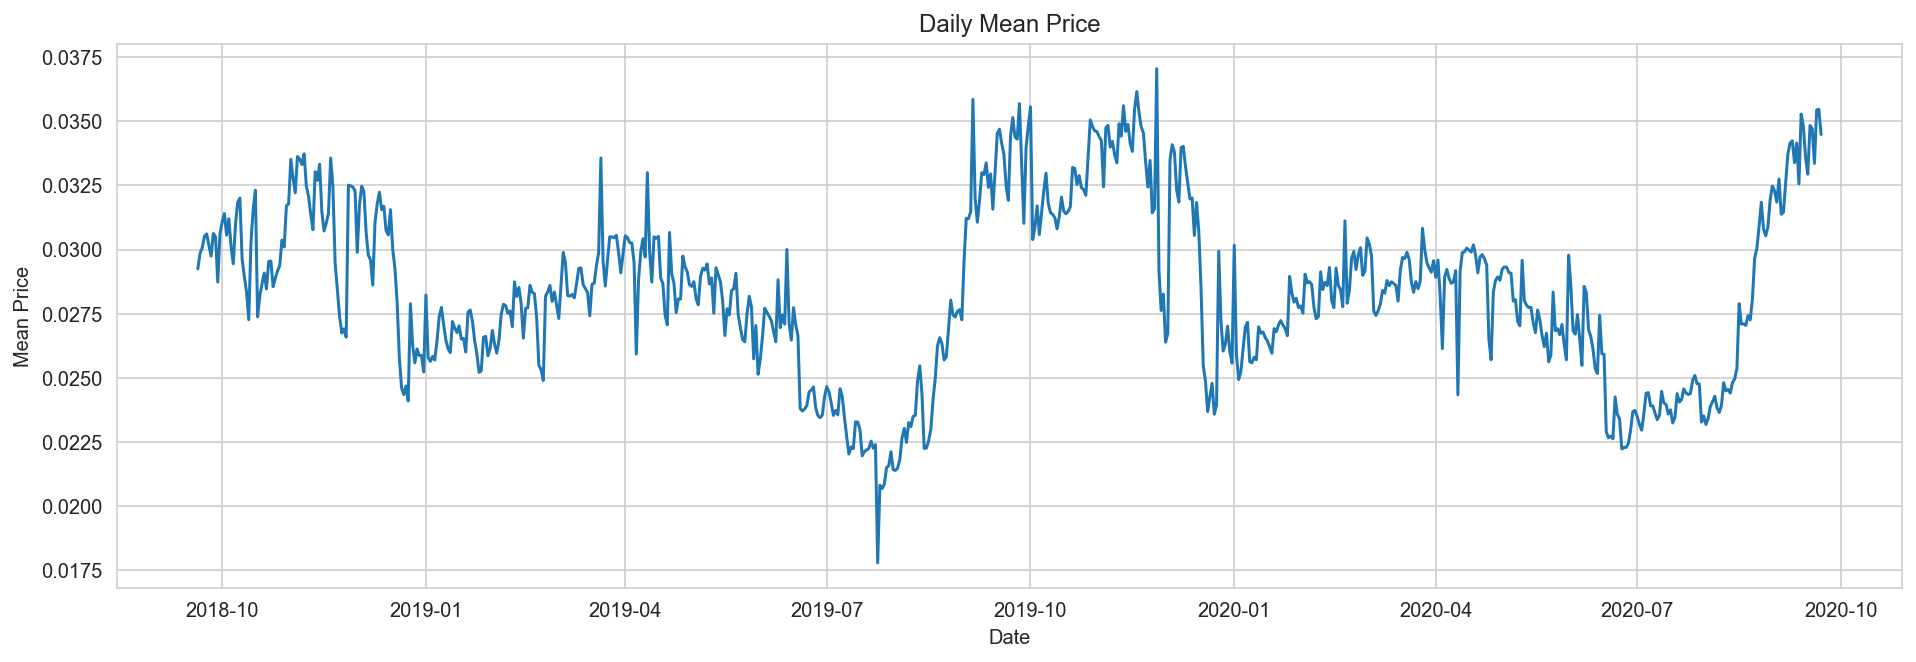

In [41]:
# view distribution of price
price_temp = trans_train_df.groupby('t_dat')['price'].mean().reset_index()
price_temp.columns = ['date', 'mean_price']
plt.figure(figsize=(16,5))
plt.title('Daily Mean Price')
plt.plot(price_temp['date'], price_temp['mean_price'])
plt.xlabel('Date')
plt.ylabel('Mean Price')

By plotting the daily mean price, it is interesting to note that there are periodical peaks and troughs, likely due to the introduction of new items ('in season') that may have pushed up the mean price of all articles, or removal of expensive items ('out of season') that may have caused the opposite effect. Most notably, the mean price seems to have reached its lowest point during 2019-08. 

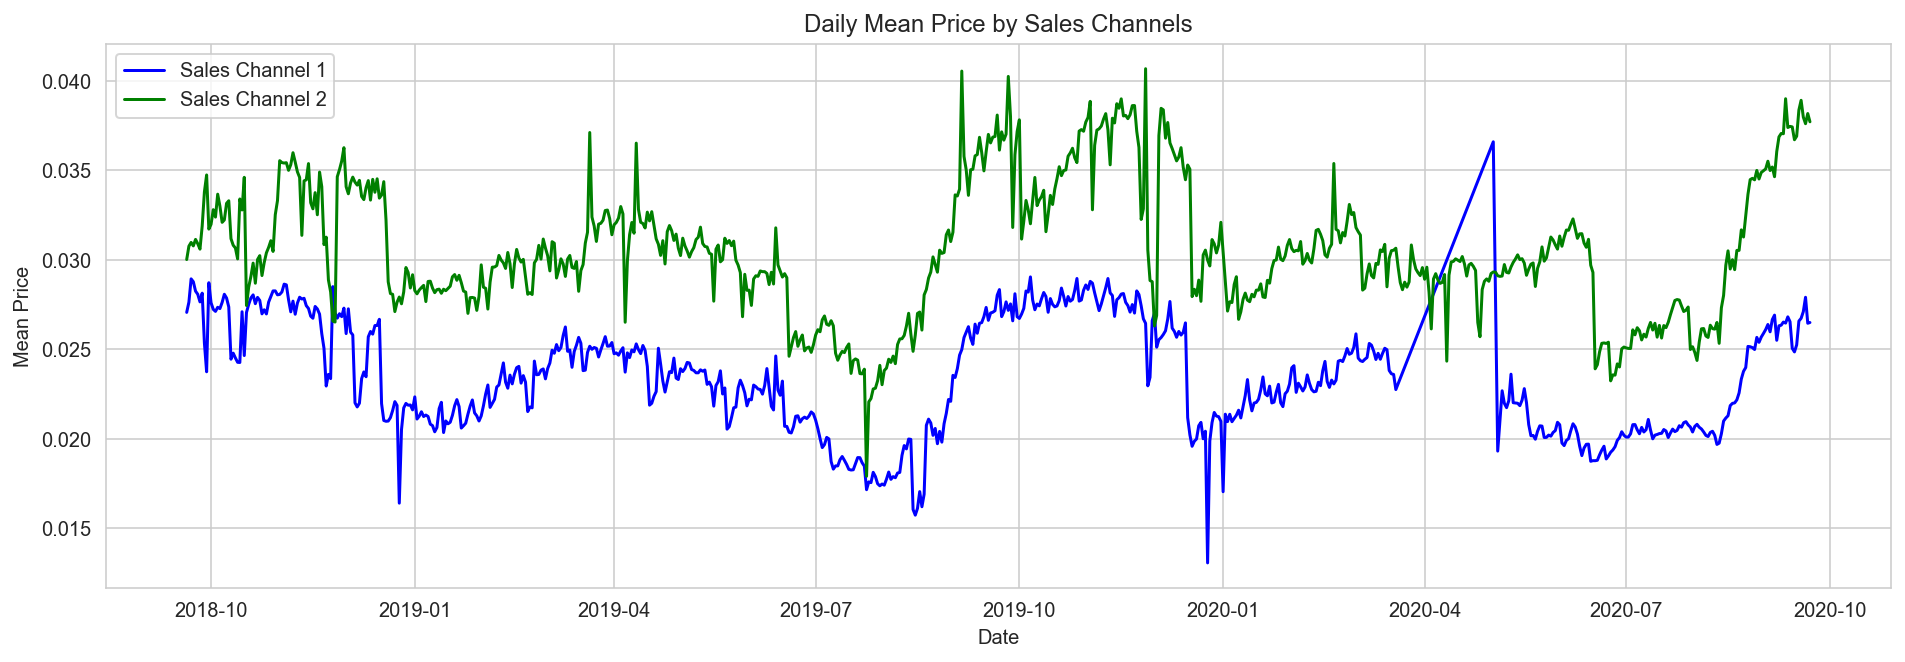

In [43]:
# view distribution of price, differentiated by sales channel
price_temp = trans_train_df.groupby(['t_dat','sales_channel_id'])['price'].mean().reset_index()
price_temp.columns = ['date', 'sales_channel', 'mean_price']
fig,ax = plt.subplots(1,1,figsize=(16,5))
ax.plot(price_temp.loc[price_temp['sales_channel']==1,'date'], price_temp.loc[price_temp['sales_channel']==1,'mean_price'], label='Sales Channel 1', color='blue')
ax.plot(price_temp.loc[price_temp['sales_channel']==2,'date'], price_temp.loc[price_temp['sales_channel']==2,'mean_price'], label='Sales Channel 2', color='green')
ax.legend()
plt.title('Daily Mean Price by Sales Channels')
plt.xlabel('Date')
plt.ylabel('Mean Price')
plt.show()

By comparing the mean price based on `sales_channel_id`, it can be seen that transactions in 'Sales Channel 2' have obtained higher mean prices as compared to those in 'Sales Channel 1', though it is interesting to note that there is a sharp spike in mean price for 'Sales Channel 1' during 2020-04 and 2020-05. 

Given the fluctuations present in the mean price, let's do a logarithmic transformation and understand if the higher price transactions belong more exclusively to any particular sales channel. 

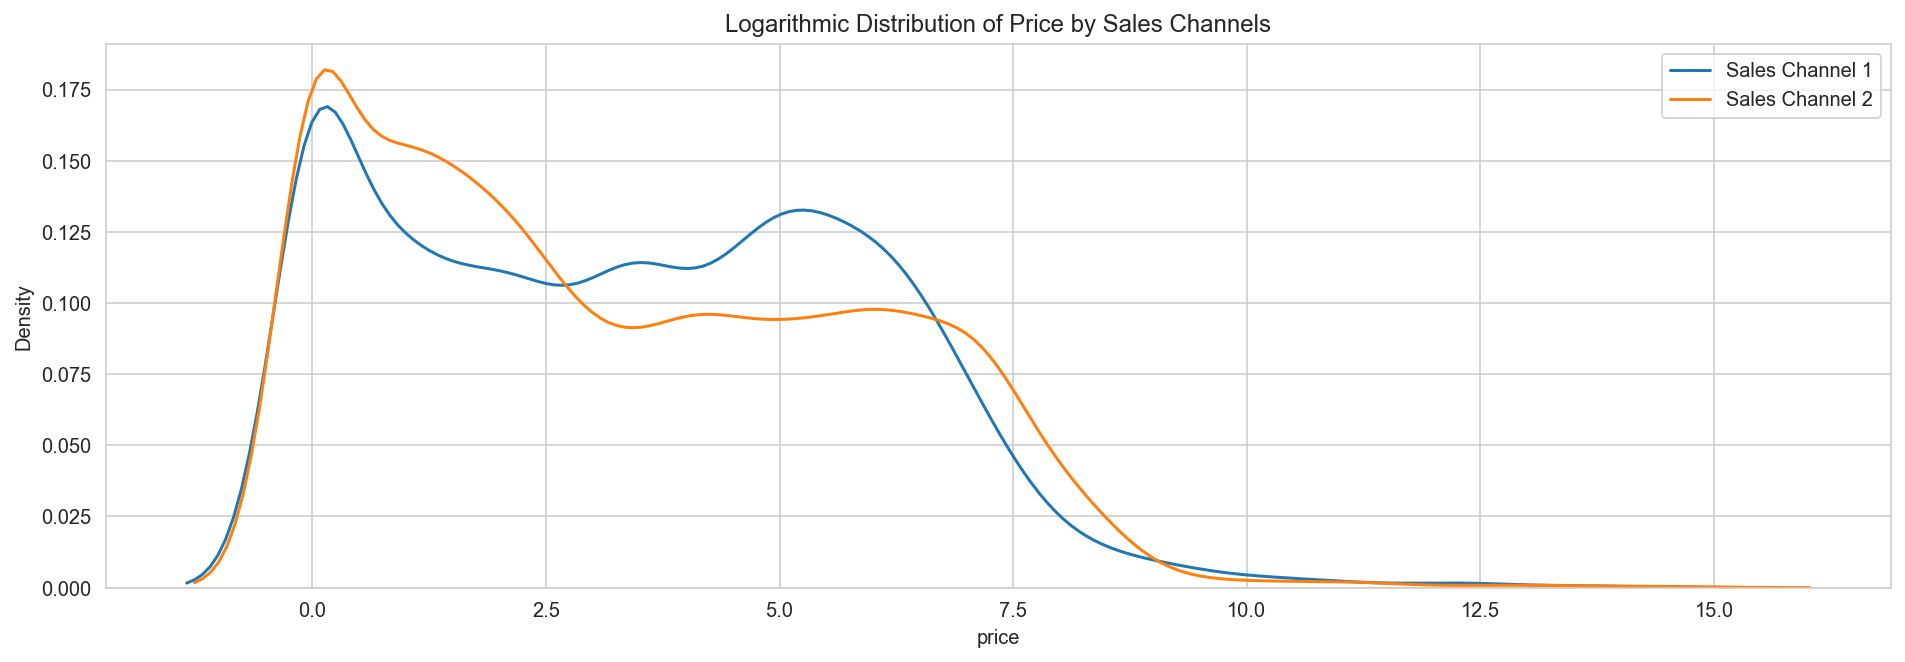

In [53]:
# apply log transformation 
fig,ax = plt.subplots(1,1,figsize=(16,5))
sns.kdeplot(np.log(trans_train_df.loc[trans_train_df['sales_channel_id']==1]['price'].value_counts()))
sns.kdeplot(np.log(trans_train_df.loc[trans_train_df['sales_channel_id']==2]['price'].value_counts()))
ax.legend(labels=['Sales Channel 1', 'Sales Channel 2'])
plt.title('Logarithmic Distribution of Price by Sales Channels')
plt.show()

By plotting the logarithmic transformation of prices, it seems that a large proportion of lower-priced items (below price of 2.5) and slightly higher proportion of higher-priced items (more than price of 7.0) fall under 'Sales Channel 2'. The remaining mid-price items (between price of 2.5 to 7.0) seem to be more distributed under 'Sales Channel 1'. 

#### 4.4. Sample Submission Dataset

In [54]:
# apply function for simple_eda
simple_eda(df=sample_sub_df, name='Sample Submission')

The Sample Submission dataset has 1371980 rows and 2 columns.

No. of duplicated rows: 0

Columns with missing values:
customer_id    0
prediction     0
dtype: int64

View data types:
customer_id    object
prediction     object
dtype: object

Displaying the first five rows of Sample Submission dataset:


customer_id  \
0  00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...   
1  0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...   
2  000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...   
3  00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...   
4  00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...   

                                          prediction  
0  0706016001 0706016002 0372860001 0610776002 07...  
1  0706016001 0706016002 0372860001 0610776002 07...  
2  0706016001 0706016002 0372860001 0610776002 07...  
3  0706016001 0706016002 0372860001 0610776002 07...  
4  0706016001 0706016002 0372860001 0610776002 07...

Some observations:
- There are no missing values in the Sample Submission dataset. 

In [55]:
# obtain unique count of values
unique_values(df=sample_sub_df)

total   unique
customer_id  1371980  1371980
prediction   1371980        1

Looking at the count of unique values, it seems that:
- Values under `prediction` may differ across each customer_id, based on his/her preferences.

#### 4.5. Image Folder

Earlier, we have noted that there's a total of 105,542 unique `article_id` present in the Articles dataset. However, there are only 105,100 image files in the Image folder.

Let's identify that `article_id` that does not have corresponding image files.

In [60]:
# store images_names into a dataframe
image_name_df = pd.DataFrame(images_names, columns=['image_name'])

# extract the article_id from the images_names
image_name_df['article_id'] = image_name_df['image_name'].apply(lambda x:int(x[1:]))

# view top 5 rows
image_name_df.head(5)

image_name  article_id
0  0249136006   249136006
1  0244267027   244267027
2  0244267032   244267032
3  0240670058   240670058
4  0241436001   241436001

In [71]:
articles_df.head(2)

article_id  product_code  prod_name  product_type_no product_type_name  \
0   108775015        108775  Strap top              253          Vest top   
1   108775044        108775  Strap top              253          Vest top   

   product_group_name  graphical_appearance_no graphical_appearance_name  \
0  Garment Upper body                  1010016                     Solid   
1  Garment Upper body                  1010016                     Solid   

   colour_group_code colour_group_name  perceived_colour_value_id  \
0                  9             Black                          4   
1                 10             White                          3   

  perceived_colour_value_name  perceived_colour_master_id  \
0                        Dark                           5   
1                       Light                           9   

  perceived_colour_master_name  department_no department_name index_code  \
0                        Black           1676    Jersey Basic          A   
1                        White           1676    Jersey Basic          A   

   index_name  index_group_no index_group_name  section_no  \
0  Ladieswear               1       Ladieswear          16   
1  Ladieswear               1       Ladieswear          16   

             section_name  garment_group_no garment_group_name  \
0  Womens Everyday Basics              1002       Jersey Basic   
1  Womens Everyday Basics              1002       Jersey Basic   

                               detail_desc  
0  Jersey top with narrow shoulder straps.  
1  Jersey top with narrow shoulder straps.

In [73]:
# create a temp articles_df
temp_articles_df = articles_df[['article_id', 'product_code', 'product_group_name']]

# do a left join of image_name_df with temp_articles_df
articles_image_df = pd.merge(temp_articles_df, image_name_df, on='article_id', how='left')

# view top 5 rows
articles_image_df.head(5)

article_id  product_code  product_group_name  image_name
0   108775015        108775  Garment Upper body  0108775015
1   108775044        108775  Garment Upper body  0108775044
2   108775051        108775  Garment Upper body  0108775051
3   110065001        110065           Underwear  0110065001
4   110065002        110065           Underwear  0110065002

In [78]:
# identify rows with null values in image_name column
articles_no_image_df = articles_image_df[articles_image_df['image_name'].isnull()]
print(f'There are {articles_no_image_df.shape[0]} articles with no associated images.')

unique_product_codes = articles_no_image_df['product_code'].nunique()
print(f'Of which, there are {unique_product_codes} unique product codes.')

pdt_grp_name_list = list(articles_no_image_df['product_group_name'].unique())
print(f'Some of the product group names include: {pdt_grp_name_list}')
print()

# view top 5 rows 
articles_no_image_df.head(5)

There are 442 articles with no associated images.
Of which, there are 372 unique product codes.
Some of the product group names include: ['Nightwear', 'Garment Lower body', 'Shoes', 'Garment Full body', 'Accessories', 'Garment Upper body', 'Underwear', 'Socks & Tights', 'Swimwear', 'Cosmetic']



article_id  product_code  product_group_name image_name
88    174057028        174057           Nightwear        NaN
117   179208001        179208  Garment Lower body        NaN
258   212042043        212042               Shoes        NaN
259   212042066        212042               Shoes        NaN
261   212629004        212629   Garment Full body        NaN

##### 4.5.1 Visualising the images

Let's view some of the images present in the Image folder. 

In [95]:
# create function to view images
def view_image(articles_image_df, product_group_name, cols=1, rows=-1):
    image_path = '../data/raw/images'
    im_df = articles_image_df.loc[articles_image_df['product_group_name']==product_group_name]
    article_ids = im_df['article_id'].values[0:cols*rows]
    plt.figure(figsize=(1+3*cols, 1+4*rows))
    
    # iterate through all article_ids available
    for i in range(cols*rows):
        article_id = ('0' + str(article_ids[i]))[-10:]
        plt.subplot(rows, cols, i+1)
        plt.title(f'{product_group_name} {article_id[:3]}\n{article_id}.jpg')
        image = Image.open(f'{image_path}/{article_id[:3]}/{article_id}.jpg')
        plt.imshow(image)

In [96]:
# view all unique product group name
articles_image_df['product_group_name'].unique()

array(['Garment Upper body', 'Underwear', 'Socks & Tights',
       'Garment Lower body', 'Accessories', 'Items', 'Nightwear',
       'Unknown', 'Underwear/nightwear', 'Shoes', 'Swimwear',
       'Garment Full body', 'Cosmetic', 'Interior textile', 'Bags',
       'Furniture', 'Garment and Shoe care', 'Fun', 'Stationery'],
      dtype=object)

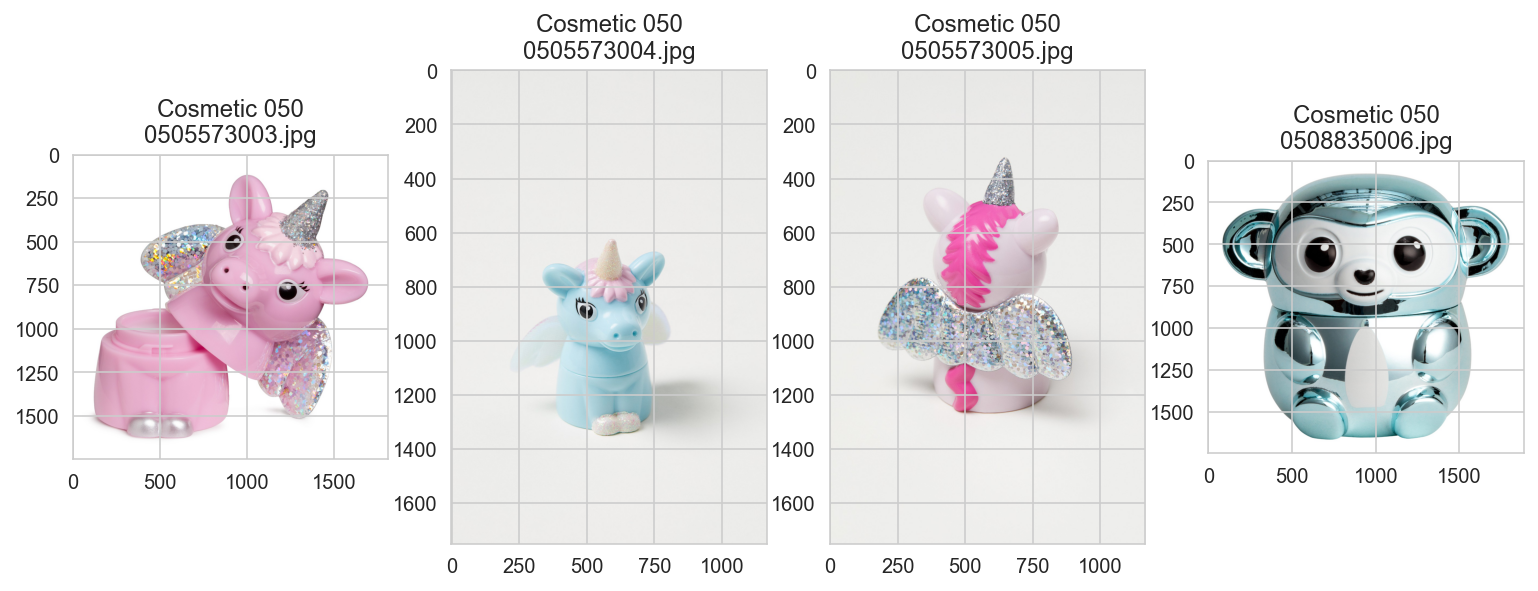

In [98]:
# view images under 'Cosmetic'
view_image(articles_image_df, product_group_name='Cosmetic', cols=4, rows=1)

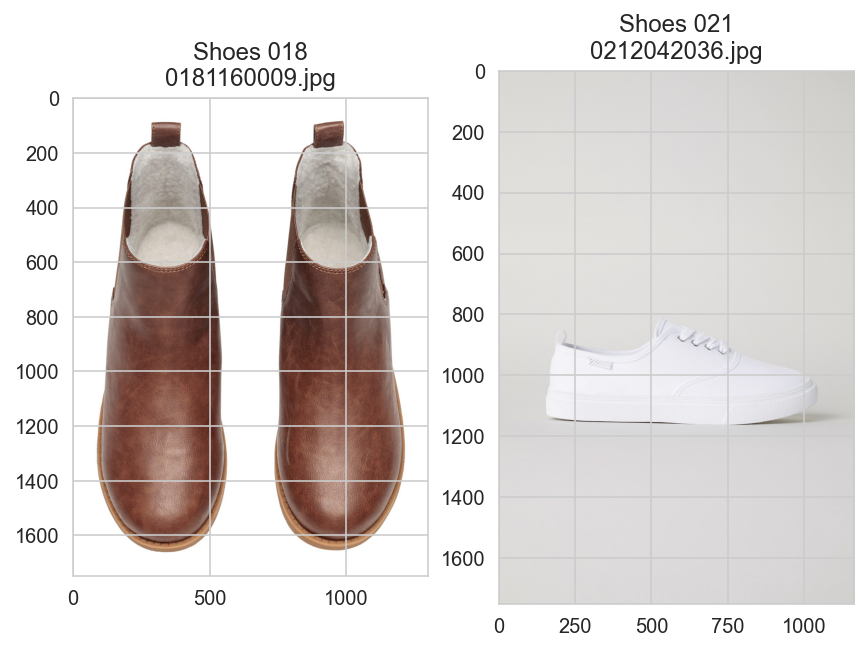

In [101]:
# view images under 'Shoes'
view_image(articles_image_df, product_group_name='Shoes', cols=2, rows=1)

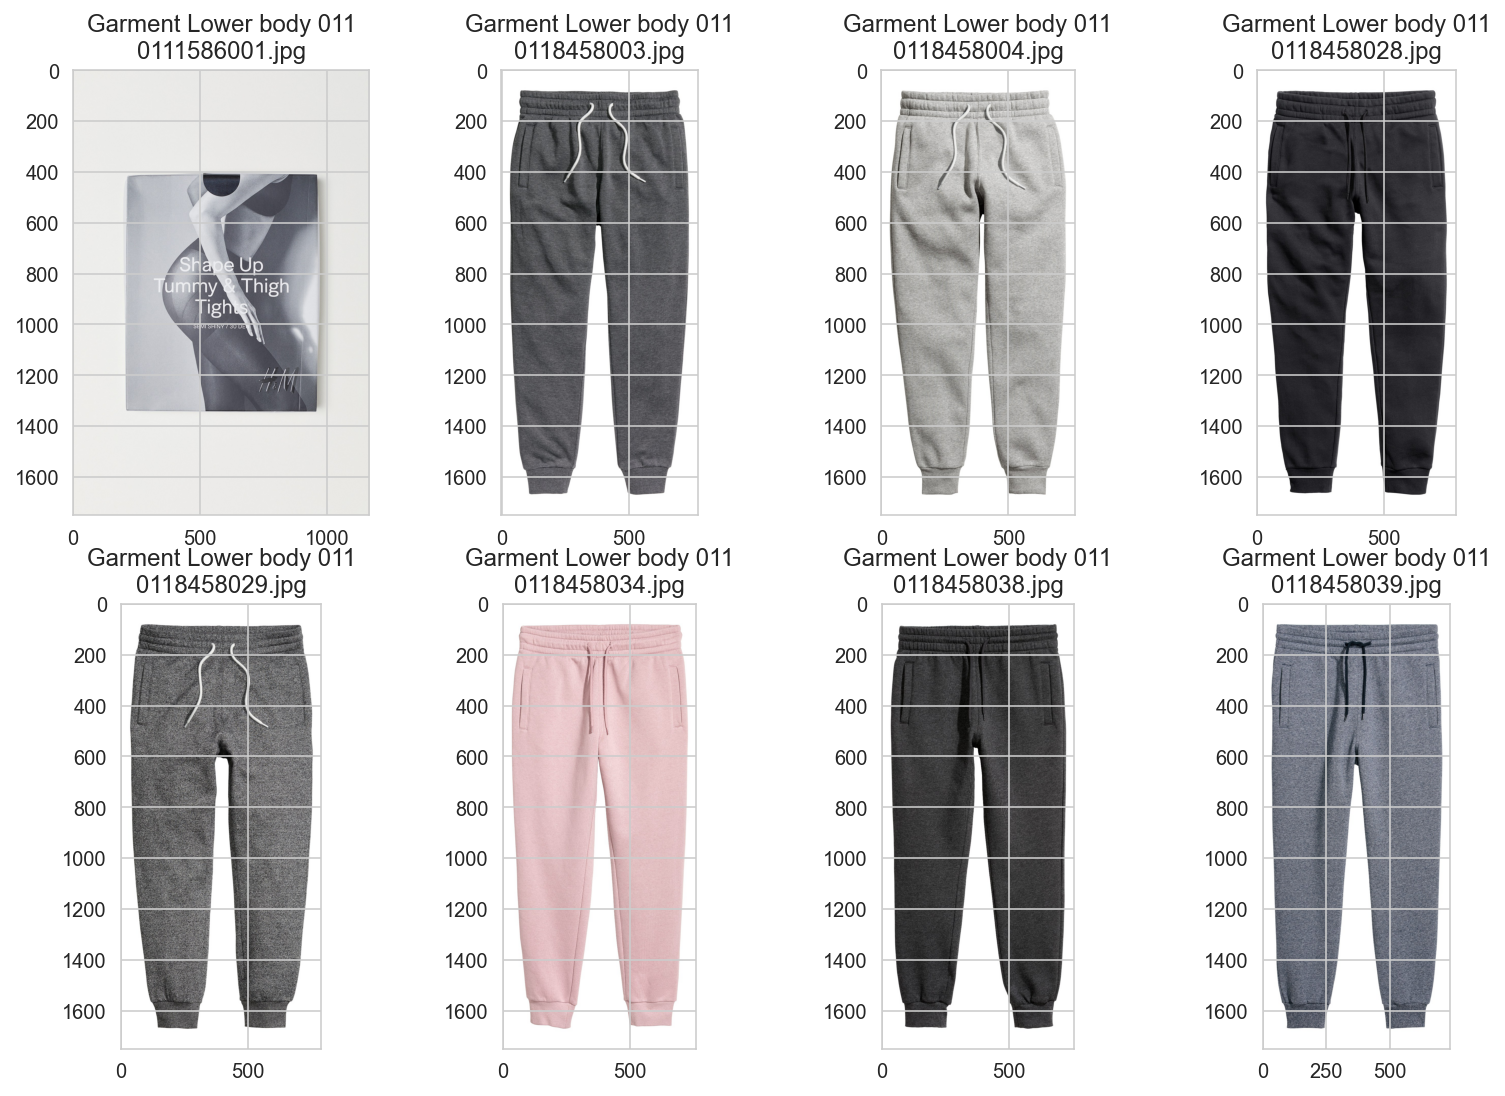

In [103]:
# view images under 'Garment Lower body'
view_image(articles_image_df, product_group_name='Garment Lower body', cols=4, rows=2)

### 5. Next Steps

In the next notebook, we will be looking into how the commonly purchased items by certain groups of customers can be grouped together and offered as recommendations.